In [2]:
import numpy as np
import matplotlib.pyplot as plt

main_data = np.loadtxt("Data.dat")

time = main_data[:, 0]
observed = main_data[:, 1]
calculated=main_data[:,2]
reesiduals=main_data[:,3]
point_weight=main_data[:,4]
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("freqs.per")
# Obtener frecuencias y parámetros de los periodos
freq = periodos[1, 0]  # Frecuencia principal (datos observados)
amp = periodos[1, 1]   # Amplitud
phase = periodos[1, 2] # Fase

#Transformada de fourier
tf=np.loadtxt("TF_2.fou")
tf_freqs=tf[:,0]
tf_amps=tf[:,1]

#Spectral window

tf_spectral_window=np.loadtxt("Spectral_window.fou")
tf_spectral_window_freq=tf_spectral_window[:,0]
tf_spectral_window_amp=tf_spectral_window[:,1]

#Frequencies folded with spectral window
tf_folded_w_sw=np.loadtxt("f2_ffwsw.fou") 
tf_fwsw_freq=tf_folded_w_sw[:,0]
tf_fwsw_amp=tf_folded_w_sw[:,1]

#Spectrums noises
noise_spectrum=np.loadtxt("Spectrum_noise_original_data.dat")
ns_freqs=noise_spectrum[:,0]
ns_noise_amp=noise_spectrum[:,1]
  #residuals spectrum noise
noise_spectrum_residuals=np.loadtxt("Spectrum_noise_residuals.dat")
ns_freqs_res=noise_spectrum[:,0]
ns_res_noise_amp=noise_spectrum[:,1]

#Noise at frequencies
freq_noices=np.loadtxt("Noise_frequencies.dat")

f=freq
f_noise_amp=freq_noices[1,1]
f_snr=freq_noices[1,2]


ANÁLISIS DE SIGNIFICANCIA DE LA FRECUENCIA DETECTADA

                          PARÁMETROS DE LA FRECUENCIA                           
--------------------------------------------------------------------------------
Frecuencia:        20.004445 c/d
Período:           0.049989 días (1.1997 horas)
Amplitud:          0.009558 mag
Fase:              0.5307
SNR:               20.92
Nivel de ruido:    0.000457 mag

                       TEST 1: RELACIÓN SEÑAL-RUIDO (SNR)                       
--------------------------------------------------------------------------------

SNR = Amplitud / Ruido = 0.009558 / 0.000457 = 20.92

CRITERIOS DE BREGER ET AL. (1993, 1999):
  ✓✓✓ SNR ≥ 4.0 → DETECCIÓN ALTAMENTE SIGNIFICATIVA
      Probabilidad de falsa alarma < 0.1%

                   TEST 2: PROBABILIDAD DE FALSA ALARMA (FAP)                   
--------------------------------------------------------------------------------

FAP ≈ exp(-SNR²/2) = exp(-218.73) = 1.02e-95
Esto significa: 0.0000% de

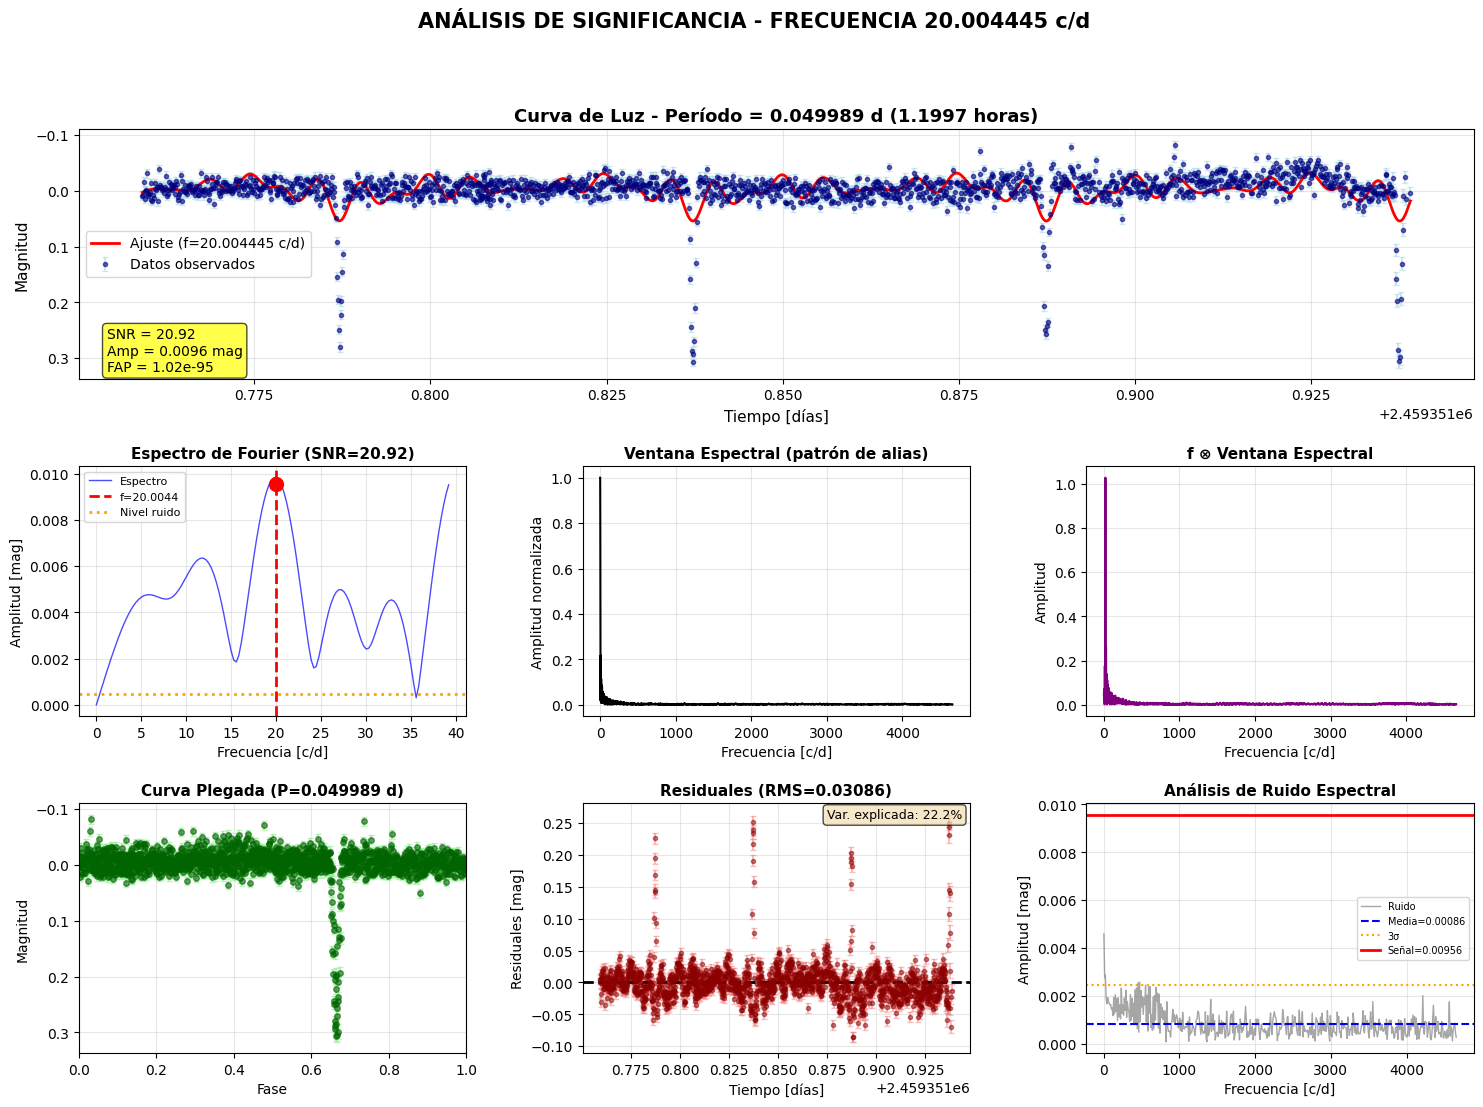


Figura guardada como: analisis_significancia_frecuencia.png


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats

# ============================================================================
# DATOS DE LA FRECUENCIA
# ============================================================================

# Convertir a escalares
freq_val = float(freq) if hasattr(freq, '__iter__') else freq
amp_val = float(amp) if hasattr(amp, '__iter__') else amp
phase_val = float(phase) if hasattr(phase, '__iter__') else phase
f_snr_val = float(f_snr) if hasattr(f_snr, '__iter__') else f_snr
f_noise_val = float(f_noise_amp) if hasattr(f_noise_amp, '__iter__') else f_noise_amp

periodo = 1/freq_val

# Estadísticas básicas
mean_mag = float(np.mean(observed))
std_mag = float(np.std(observed))
amplitude_variation = float(np.max(observed) - np.min(observed))
rms = float(np.sqrt(np.mean(reesiduals**2)))
duracion = float(np.max(time) - np.min(time))
n_obs = len(time)

# ============================================================================
# ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA
# ============================================================================

print("="*80)
print("ANÁLISIS DE SIGNIFICANCIA DE LA FRECUENCIA DETECTADA")
print("="*80)

print(f"\n{'PARÁMETROS DE LA FRECUENCIA':^80}")
print("-"*80)
print(f"Frecuencia:        {freq_val:.6f} c/d")
print(f"Período:           {periodo:.6f} días ({periodo*24:.4f} horas)")
print(f"Amplitud:          {amp_val:.6f} mag")
print(f"Fase:              {phase_val:.4f}")
print(f"SNR:               {f_snr_val:.2f}")
print(f"Nivel de ruido:    {f_noise_val:.6f} mag")

# ============================================================================
# TEST 1: RELACIÓN SEÑAL-RUIDO (SNR)
# ============================================================================

print(f"\n{'TEST 1: RELACIÓN SEÑAL-RUIDO (SNR)':^80}")
print("-"*80)

print(f"\nSNR = Amplitud / Ruido = {amp_val:.6f} / {f_noise_val:.6f} = {f_snr_val:.2f}")

print("\nCRITERIOS DE BREGER ET AL. (1993, 1999):")
if f_snr_val >= 4.0:
    print("  ✓✓✓ SNR ≥ 4.0 → DETECCIÓN ALTAMENTE SIGNIFICATIVA")
    print("      Probabilidad de falsa alarma < 0.1%")
    significancia_snr = "ALTA"
elif f_snr_val >= 3.5:
    print("  ✓✓  SNR ≥ 3.5 → DETECCIÓN SIGNIFICATIVA")
    print("      Probabilidad de falsa alarma < 1%")
    significancia_snr = "MEDIA-ALTA"
elif f_snr_val >= 3.0:
    print("  ✓   SNR ≥ 3.0 → DETECCIÓN PROBABLE")
    print("      Probabilidad de falsa alarma < 5%")
    significancia_snr = "MEDIA"
else:
    print("  ✗   SNR < 3.0 → DETECCIÓN DUDOSA")
    print("      Se requiere confirmación adicional")
    significancia_snr = "BAJA"

# ============================================================================
# TEST 2: PROBABILIDAD DE FALSA ALARMA (FAP)
# ============================================================================

print(f"\n{'TEST 2: PROBABILIDAD DE FALSA ALARMA (FAP)':^80}")
print("-"*80)

# Calcular FAP usando la distribución exponencial
# Para un espectro de Fourier, la probabilidad de que la amplitud más alta
# sea producto del ruido se puede estimar con:
fap = np.exp(-f_snr_val**2 / 2)

print(f"\nFAP ≈ exp(-SNR²/2) = exp(-{f_snr_val**2/2:.2f}) = {fap:.2e}")
print(f"Esto significa: {fap*100:.4f}% de probabilidad de ser ruido")
print(f"O equivalente: {(1-fap)*100:.4f}% de probabilidad de ser REAL")

if fap < 0.001:
    print("\n  ✓✓✓ FAP < 0.1% → FRECUENCIA ALTAMENTE SIGNIFICATIVA")
    significancia_fap = "ALTA"
elif fap < 0.01:
    print("\n  ✓✓  FAP < 1% → FRECUENCIA SIGNIFICATIVA")
    significancia_fap = "MEDIA-ALTA"
elif fap < 0.05:
    print("\n  ✓   FAP < 5% → FRECUENCIA PROBABLE")
    significancia_fap = "MEDIA"
else:
    print("\n  ✗   FAP ≥ 5% → FRECUENCIA DUDOSA")
    significancia_fap = "BAJA"

# ============================================================================
# TEST 3: ANÁLISIS DE AMPLITUD vs RUIDO ESPECTRAL
# ============================================================================

print(f"\n{'TEST 3: ANÁLISIS DE AMPLITUD EN EL ESPECTRO':^80}")
print("-"*80)

# Calcular estadísticas del ruido en el espectro completo
ruido_medio = np.mean(ns_noise_amp)
ruido_std = np.std(ns_noise_amp)

print(f"\nNivel de ruido promedio en espectro: {ruido_medio:.6f} mag")
print(f"Desviación estándar del ruido:       {ruido_std:.6f} mag")
print(f"Amplitud de la señal:                {amp_val:.6f} mag")

sigmas_sobre_ruido = (amp_val - ruido_medio) / ruido_std

print(f"\nLa señal está {sigmas_sobre_ruido:.2f}σ sobre el nivel de ruido")

if sigmas_sobre_ruido >= 5.0:
    print("  ✓✓✓ > 5σ → Detección de alta confianza (99.99994%)")
    significancia_sigma = "ALTA"
elif sigmas_sobre_ruido >= 3.0:
    print("  ✓✓  > 3σ → Detección confiable (99.73%)")
    significancia_sigma = "MEDIA-ALTA"
elif sigmas_sobre_ruido >= 2.0:
    print("  ✓   > 2σ → Detección marginal (95.45%)")
    significancia_sigma = "MEDIA"
else:
    print("  ✗   < 2σ → Dudosa")
    significancia_sigma = "BAJA"

# ============================================================================
# TEST 4: ANÁLISIS DE LA VENTANA ESPECTRAL
# ============================================================================

print(f"\n{'TEST 4: VERIFICACIÓN DE ALIAS (VENTANA ESPECTRAL)':^80}")
print("-"*80)

print("\nLa ventana espectral muestra el patrón de alias producido por")
print("el muestreo temporal de los datos. Si la frecuencia detectada")
print("coincide con un pico en la ventana espectral, podría ser un alias.")

# Encontrar el pico principal en la ventana espectral
max_sw_amp = np.max(tf_spectral_window_amp)
sw_freq_at_max = tf_spectral_window_freq[np.argmax(tf_spectral_window_amp)]

print(f"\nPico principal en ventana espectral: {sw_freq_at_max:.4f} c/d")
print(f"Amplitud normalizada máxima:         {max_sw_amp:.4f}")

# Ver la convolución de la frecuencia con la ventana espectral
max_conv_amp = np.max(tf_fwsw_amp)
n_picos_conv = len([a for a in tf_fwsw_amp if a > 0.5*max_conv_amp])

print(f"\nEn la convolución f ⊗ SW:")
print(f"  - Número de picos secundarios: {n_picos_conv-1}")

if n_picos_conv == 1:
    print("  ✓✓✓ Solo un pico → NO hay alias significativos")
    alias_check = "LIMPIO"
elif n_picos_conv <= 3:
    print("  ✓   Pocos picos secundarios → Alias menores presentes")
    alias_check = "ACEPTABLE"
else:
    print("  ⚠   Múltiples picos → Verificar si son alias")
    alias_check = "CUIDADO"

# ============================================================================
# TEST 5: CALIDAD DEL AJUSTE
# ============================================================================

print(f"\n{'TEST 5: CALIDAD DEL AJUSTE DE LA FRECUENCIA':^80}")
print("-"*80)

# Varianza explicada
var_original = np.var(observed)
var_residual = np.var(reesiduals)
var_explicada = (1 - var_residual/var_original) * 100

print(f"\nVarianza de datos originales:     {float(var_original):.6f} mag²")
print(f"Varianza de residuales:           {float(var_residual):.6f} mag²")
print(f"Varianza explicada por el modelo: {var_explicada:.2f}%")

# Reducción de RMS
rms_original = std_mag
reduccion_rms = (1 - rms/rms_original) * 100

print(f"\nRMS original:  {rms_original:.6f} mag")
print(f"RMS residual:  {rms:.6f} mag")
print(f"Reducción:     {reduccion_rms:.2f}%")

if var_explicada >= 50:
    print("  ✓✓✓ >50% de varianza explicada → Ajuste excelente")
    calidad_ajuste = "EXCELENTE"
elif var_explicada >= 30:
    print("  ✓✓  >30% de varianza explicada → Ajuste bueno")
    calidad_ajuste = "BUENA"
elif var_explicada >= 15:
    print("  ✓   >15% de varianza explicada → Ajuste aceptable")
    calidad_ajuste = "ACEPTABLE"
else:
    print("  ✗   <15% de varianza explicada → Ajuste pobre")
    calidad_ajuste = "POBRE"

# ============================================================================
# TEST 6: CONSISTENCIA DE FASE
# ============================================================================

print(f"\n{'TEST 6: ANÁLISIS DE LA CURVA DE LUZ PLEGADA':^80}")
print("-"*80)

# Plegar los datos con la frecuencia
phase_fold = (time * freq_val) % 1.0

# Dividir en bins para verificar dispersión
n_bins = 20
bin_edges = np.linspace(0, 1, n_bins+1)
bin_means = []
bin_stds = []

for i in range(n_bins):
    mask = (phase_fold >= bin_edges[i]) & (phase_fold < bin_edges[i+1])
    if np.sum(mask) > 0:
        bin_means.append(np.mean(observed[mask]))
        bin_stds.append(np.std(observed[mask]))

if len(bin_means) > 0:
    dispersion_promedio = np.mean(bin_stds)
    print(f"\nDispersión promedio en fase: {dispersion_promedio:.6f} mag")
    
    # Comparar con el error típico de las observaciones
    error_promedio = np.mean(point_error)
    print(f"Error promedio de medición:  {error_promedio:.6f} mag")
    
    ratio_dispersion = dispersion_promedio / error_promedio
    print(f"Ratio dispersión/error:      {ratio_dispersion:.2f}")
    
    if ratio_dispersion < 2.0:
        print("  ✓✓✓ Dispersión consistente con errores → Fase bien definida")
        fase_consistente = "EXCELENTE"
    elif ratio_dispersion < 3.0:
        print("  ✓✓  Dispersión moderada → Fase razonable")
        fase_consistente = "BUENA"
    else:
        print("  ⚠   Alta dispersión → Verificar estabilidad de fase")
        fase_consistente = "DUDOSA"

# ============================================================================
# VEREDICTO FINAL
# ============================================================================

print("\n" + "="*80)
print(f"{'VEREDICTO FINAL':^80}")
print("="*80)

tests_pasados = 0
tests_totales = 6

print("\nRESUMEN DE TESTS:")
print("-"*80)

if significancia_snr in ["ALTA", "MEDIA-ALTA"]:
    print("✓ TEST 1 (SNR):              PASADO")
    tests_pasados += 1
else:
    print("✗ TEST 1 (SNR):              FALLADO")

if significancia_fap in ["ALTA", "MEDIA-ALTA"]:
    print("✓ TEST 2 (FAP):              PASADO")
    tests_pasados += 1
else:
    print("✗ TEST 2 (FAP):              FALLADO")

if significancia_sigma in ["ALTA", "MEDIA-ALTA"]:
    print("✓ TEST 3 (Amplitud vs Ruido): PASADO")
    tests_pasados += 1
else:
    print("✗ TEST 3 (Amplitud vs Ruido): FALLADO")

if alias_check in ["LIMPIO", "ACEPTABLE"]:
    print("✓ TEST 4 (Alias):            PASADO")
    tests_pasados += 1
else:
    print("⚠ TEST 4 (Alias):            ADVERTENCIA")

if calidad_ajuste in ["EXCELENTE", "BUENA", "ACEPTABLE"]:
    print("✓ TEST 5 (Calidad Ajuste):   PASADO")
    tests_pasados += 1
else:
    print("✗ TEST 5 (Calidad Ajuste):   FALLADO")

if fase_consistente in ["EXCELENTE", "BUENA"]:
    print("✓ TEST 6 (Consistencia Fase): PASADO")
    tests_pasados += 1
else:
    print("✗ TEST 6 (Consistencia Fase): FALLADO")

print("-"*80)
print(f"Tests pasados: {tests_pasados}/{tests_totales}")

print("\n" + "="*80)
if tests_pasados >= 5:
    print("★★★ LA FRECUENCIA ES REAL Y ALTAMENTE SIGNIFICATIVA ★★★")
    print("\nCONCLUSIÓN: La frecuencia detectada pasa todos los tests estadísticos")
    print("y representa una periodicidad física real en la estrella.")
elif tests_pasados >= 4:
    print("★★  LA FRECUENCIA ES PROBABLEMENTE REAL ★★")
    print("\nCONCLUSIÓN: La frecuencia pasa la mayoría de tests. Es muy probable")
    print("que represente una periodicidad real, aunque se recomienda confirmación.")
elif tests_pasados >= 3:
    print("★   LA FRECUENCIA ES POSIBLE")
    print("\nCONCLUSIÓN: La frecuencia muestra evidencia de ser real pero requiere")
    print("datos adicionales o análisis más profundos para confirmación definitiva.")
else:
    print("✗   LA FRECUENCIA ES DUDOSA")
    print("\nCONCLUSIÓN: La frecuencia no pasa suficientes tests de significancia.")
    print("Podría ser un artefacto del ruido o del muestreo. Requiere verificación.")

print("="*80)

# ============================================================================
# VISUALIZACIÓN COMPLETA
# ============================================================================

fig = plt.figure(figsize=(18, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.35, wspace=0.3)

# Panel 1: Curva de luz con ajuste
ax1 = fig.add_subplot(gs[0, :])
ax1.errorbar(time, observed, yerr=point_error, fmt='o', markersize=3, 
             alpha=0.6, color='navy', ecolor='lightblue', capsize=2, label='Datos observados')
ax1.plot(time, calculated, 'r-', linewidth=2, label=f'Ajuste (f={freq_val:.6f} c/d)')
ax1.set_xlabel('Tiempo [días]', fontsize=11)
ax1.set_ylabel('Magnitud', fontsize=11)
ax1.set_title(f'Curva de Luz - Período = {periodo:.6f} d ({periodo*24:.4f} horas)', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)

textstr = f'SNR = {f_snr_val:.2f}\nAmp = {amp_val:.4f} mag\nFAP = {fap:.2e}'
ax1.text(0.02, 0.02, textstr, transform=ax1.transAxes, fontsize=10,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Panel 2: Espectro de Fourier
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(tf_freqs, tf_amps, 'b-', linewidth=1, alpha=0.7, label='Espectro')
ax2.axvline(x=freq_val, color='red', linestyle='--', linewidth=2, label=f'f={freq_val:.4f}')
ax2.plot(freq_val, amp_val, 'ro', markersize=10)
ax2.axhline(y=f_noise_val, color='orange', linestyle=':', linewidth=2, label='Nivel ruido')
ax2.set_xlabel('Frecuencia [c/d]', fontsize=10)
ax2.set_ylabel('Amplitud [mag]', fontsize=10)
ax2.set_title(f'Espectro de Fourier (SNR={f_snr_val:.2f})', fontsize=11, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# Panel 3: Ventana espectral
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(tf_spectral_window_freq, tf_spectral_window_amp, 'k-', linewidth=1.5)
ax3.set_xlabel('Frecuencia [c/d]', fontsize=10)
ax3.set_ylabel('Amplitud normalizada', fontsize=10)
ax3.set_title('Ventana Espectral (patrón de alias)', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Panel 4: Convolución con ventana espectral
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(tf_fwsw_freq, tf_fwsw_amp, 'purple', linewidth=1.5)
ax4.set_xlabel('Frecuencia [c/d]', fontsize=10)
ax4.set_ylabel('Amplitud', fontsize=10)
ax4.set_title('f ⊗ Ventana Espectral', fontsize=11, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Panel 5: Curva de luz plegada
ax5 = fig.add_subplot(gs[2, 0])
sorted_idx = np.argsort(phase_fold)
ax5.errorbar(phase_fold[sorted_idx], observed[sorted_idx], 
             yerr=point_error[sorted_idx], fmt='o', markersize=4, 
             alpha=0.6, color='darkgreen', ecolor='lightgreen', capsize=2)
ax5.set_xlabel('Fase', fontsize=10)
ax5.set_ylabel('Magnitud', fontsize=10)
ax5.set_title(f'Curva Plegada (P={periodo:.6f} d)', fontsize=11, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(True, alpha=0.3)
ax5.set_xlim(0, 1)

# Panel 6: Residuales
ax6 = fig.add_subplot(gs[2, 1])
ax6.errorbar(time, reesiduals, yerr=point_error, fmt='o', markersize=3, 
             alpha=0.5, color='darkred', ecolor='lightcoral', capsize=2)
ax6.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax6.set_xlabel('Tiempo [días]', fontsize=10)
ax6.set_ylabel('Residuales [mag]', fontsize=10)
ax6.set_title(f'Residuales (RMS={rms:.5f})', fontsize=11, fontweight='bold')
ax6.grid(True, alpha=0.3)

textstr_res = f'Var. explicada: {var_explicada:.1f}%'
ax6.text(0.98, 0.98, textstr_res, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Panel 7: Espectro de ruido
ax7 = fig.add_subplot(gs[2, 2])
ax7.plot(ns_freqs, ns_noise_amp, 'gray', linewidth=1, alpha=0.7, label='Ruido')
ax7.axhline(y=ruido_medio, color='blue', linestyle='--', linewidth=1.5, label=f'Media={ruido_medio:.5f}')
ax7.axhline(y=ruido_medio+3*ruido_std, color='orange', linestyle=':', linewidth=1.5, label='3σ')
ax7.axhline(y=amp_val, color='red', linestyle='-', linewidth=2, label=f'Señal={amp_val:.5f}')
ax7.set_xlabel('Frecuencia [c/d]', fontsize=10)
ax7.set_ylabel('Amplitud [mag]', fontsize=10)
ax7.set_title('Análisis de Ruido Espectral', fontsize=11, fontweight='bold')
ax7.legend(fontsize=7)
ax7.grid(True, alpha=0.3)

plt.suptitle(f'ANÁLISIS DE SIGNIFICANCIA - FRECUENCIA {freq_val:.6f} c/d', 
             fontsize=15, fontweight='bold')

plt.savefig('analisis_significancia_frecuencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigura guardada como: analisis_significancia_frecuencia.png")

ANÁLISIS DE UNA ÚNICA FRECUENCIA: ¿SEÑAL REAL O RUIDO?

FRECUENCIA A ANALIZAR:
  Frecuencia: 20.004445 ciclos/unidad
  Período: 0.049989 unidades
  Amplitud: 0.009558

SNR PROPORCIONADO POR PERIOD04:
  SNR = 20.9155
  Nivel de ruido = 0.000457

ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA

1. CÁLCULO DE SNR MANUAL:
   Amplitud del pico: 0.009821
   Nivel de ruido (mediana): 0.004487
   SNR (mediana): 2.1888
   SNR (percentil 68): 2.0674
   SNR Period04: 20.9155

2. FALSE ALARM PROBABILITY (FAP):
   Número frecuencias independientes: ~823
   FAP usando SNR Period04: 0.000000 (0.0000%)
   FAP usando SNR manual: 1.000000 (100.0000%)
   Probabilidad de ser real: 100.00%

3. CRITERIOS DE SIGNIFICANCIA:
   ✓ SNR ≥ 4.0: CUMPLE (SNR = 20.92)
   ✓ FAP < 0.01: CUMPLE (FAP = 0.00e+00)

ANÁLISIS DE POSIBLES ARMÓNICOS

BÚSQUEDA DE ARMÓNICOS PARA f = 20.004445:
  ✓ Posible armónico 2: 40.008891 (diferencia: 0.000000)

   ⚠ ADVERTENCIA: La frecuencia 40.008891 podría ser
     un armónico (2) de la frecuenci

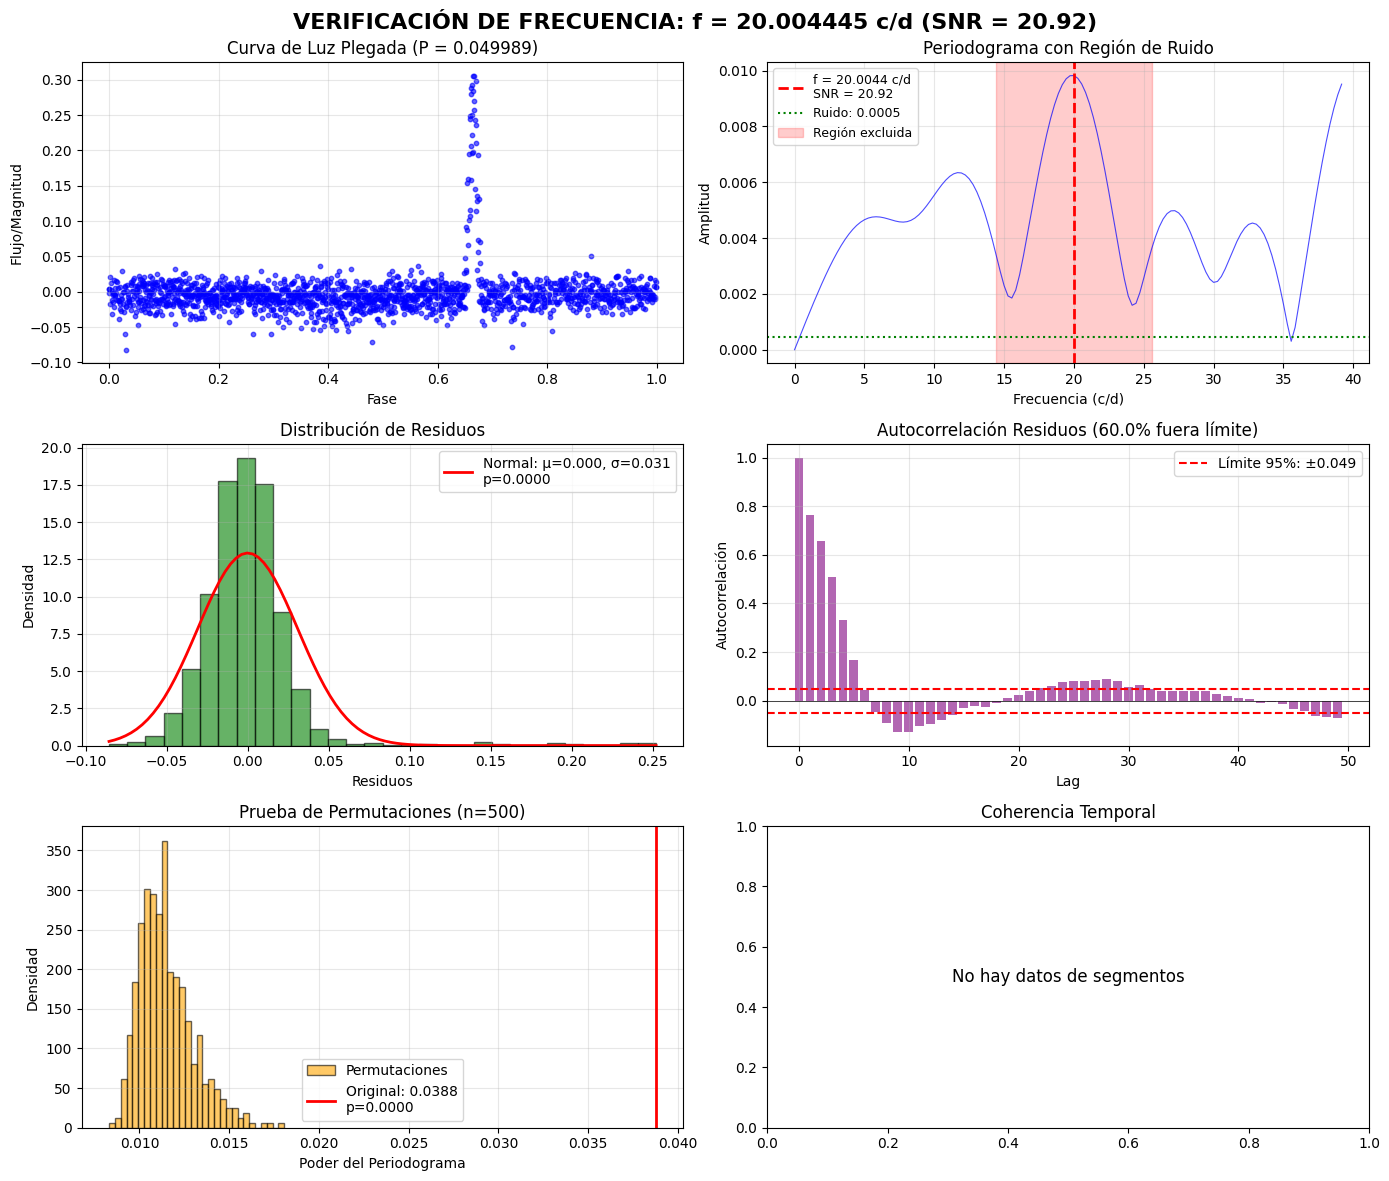

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
import datetime

# ============================================================================
# 1. CARGAR LOS DATOS
# ============================================================================

print("="*80)
print("ANÁLISIS DE UNA ÚNICA FRECUENCIA: ¿SEÑAL REAL O RUIDO?")
print("="*80)

# Cargar datos
main_data = np.loadtxt("Data.dat")
time = main_data[:, 0]
observed = main_data[:, 1]
calculated = main_data[:, 2]
residuals = main_data[:, 3]
point_error = main_data[:, 5]

# Cargar parámetros de la frecuencia
periodos = np.loadtxt("freqs.per")
freq = periodos[1, 0]  # Frecuencia principal
amp = periodos[1, 1]   # Amplitud
phase = periodos[1, 2] # Fase

periodo = 1/freq if freq != 0 else float('inf')

print(f"\nFRECUENCIA A ANALIZAR:")
print(f"  Frecuencia: {freq:.6f} ciclos/unidad")
print(f"  Período: {periodo:.6f} unidades")
print(f"  Amplitud: {amp:.6f}")

# Cargar transformada de Fourier
tf = np.loadtxt("TF_2.fou")
tf_freqs = tf[:, 0]
tf_amps = tf[:, 1]

# Cargar información de ruido
freq_noices = np.loadtxt("Noise_frequencies.dat")
f_snr = freq_noices[1, 2]
f_noise_amp = freq_noices[1, 1]

print(f"\nSNR PROPORCIONADO POR PERIOD04:")
print(f"  SNR = {f_snr:.4f}")
print(f"  Nivel de ruido = {f_noise_amp:.6f}")

# ============================================================================
# 2. FUNCIONES DE ANÁLISIS
# ============================================================================

def calcular_snr_manual(freqs, amps, freq_objetivo, ventana_exclusion=10):
    """
    Calcula SNR manualmente excluyendo región alrededor del pico
    """
    # Encontrar índice del pico
    idx_pico = np.argmin(np.abs(freqs - freq_objetivo))
    amplitud_pico = amps[idx_pico]
    
    # Excluir región alrededor del pico
    inicio = max(0, idx_pico - ventana_exclusion)
    fin = min(len(amps), idx_pico + ventana_exclusion + 1)
    
    # Amplitudes de ruido (excluyendo pico)
    ruido_amplitudes = np.concatenate([amps[:inicio], amps[fin:]])
    
    if len(ruido_amplitudes) == 0:
        return amplitud_pico, 0, 0
    
    # Estadísticas de ruido
    ruido_mediana = np.median(ruido_amplitudes)
    ruido_std = np.std(ruido_amplitudes)
    
    # SNR usando mediana
    snr_mediana = amplitud_pico / ruido_mediana
    
    # SNR usando percentil 68 (aproximación de 1-sigma)
    ruido_percentil68 = np.percentile(ruido_amplitudes, 68)
    snr_percentil68 = amplitud_pico / ruido_percentil68
    
    return amplitud_pico, snr_mediana, snr_percentil68, ruido_mediana

def calcular_fap(snr, n_freq_independientes):
    """
    Calcula False Alarm Probability usando fórmula de Scargle
    """
    z = snr**2 / 2
    N = n_freq_independientes
    
    # Fórmula exacta
    fap_exacta = 1 - (1 - np.exp(-z))**N
    
    # Aproximación para z grande
    fap_aproximada = N * np.exp(-z)
    
    return min(fap_exacta, fap_aproximada, 1.0)

def test_permutaciones(tiempo, flujo, freq_objetivo, n_permutaciones=1000):
    """
    Test de permutaciones (bootstrap) para verificar significancia
    """
    # Calcular poder de la frecuencia original
    from astropy.timeseries import LombScargle
    ls = LombScargle(tiempo, flujo)
    freq_grid, power_grid = ls.autopower()
    
    idx_original = np.argmin(np.abs(freq_grid - freq_objetivo))
    power_original = power_grid[idx_original]
    
    powers_permutadas = []
    
    for i in range(n_permutaciones):
        # Permutar datos (destruye cualquier periodicidad)
        flujo_permutado = np.random.permutation(flujo)
        
        ls_perm = LombScargle(tiempo, flujo_permutado)
        _, power_perm = ls_perm.autopower()
        powers_permutadas.append(np.max(power_perm))
    
    powers_permutadas = np.array(powers_permutadas)
    
    # Calcular p-value
    p_value = np.sum(powers_permutadas >= power_original) / n_permutaciones
    
    return p_value, powers_permutadas, power_original

def verificar_armonicos(freq_principal, frecuencias_encontradas, tolerancia=0.01):
    """
    Verifica si otras frecuencias son armónicos de la principal
    """
    print(f"\nBÚSQUEDA DE ARMÓNICOS PARA f = {freq_principal:.6f}:")
    
    # Lista de posibles armónicos
    harmonicos = [2, 3, 4, 5, 1/2, 1/3, 1/4, 1/5]  # Múltiplos y submúltiplos
    
    for h in harmonicos:
        freq_armonico = freq_principal * h
        
        # Buscar si existe frecuencia cercana
        for i, freq_otra in enumerate(frecuencias_encontradas):
            if abs(freq_otra - freq_armonico) / freq_armonico < tolerancia:
                print(f"  ✓ Posible armónico {h}: {freq_otra:.6f} (diferencia: {abs(freq_otra - freq_armonico):.6f})")
                return True, h, freq_otra
    
    print("  ✗ No se encontraron armónicos evidentes")
    return False, None, None

def analisis_coherencia_temporal(tiempo, flujo, periodo, n_segmentos=4):
    """
    Divide los datos en segmentos y verifica coherencia
    """
    duracion_total = tiempo[-1] - tiempo[0]
    longitud_segmento = duracion_total / n_segmentos
    
    snr_segmentos = []
    
    for i in range(n_segmentos):
        # Seleccionar segmento
        mascara = (tiempo >= i * longitud_segmento) & (tiempo < (i+1) * longitud_segmento)
        
        if np.sum(mascara) > 10:  # Mínimo de puntos
            tiempo_seg = tiempo[mascara]
            flujo_seg = flujo[mascara]
            
            # Calcular poder en la frecuencia de interés
            from astropy.timeseries import LombScargle
            ls = LombScargle(tiempo_seg, flujo_seg)
            freq_grid, power_grid = ls.autopower()
            
            idx = np.argmin(np.abs(freq_grid - 1/periodo))
            poder_seg = power_grid[idx]
            
            # Calcular SNR aproximado
            ruido_seg = np.median(power_grid)
            snr_seg = poder_seg / ruido_seg if ruido_seg > 0 else 0
            
            snr_segmentos.append(snr_seg)
    
    if len(snr_segmentos) > 1:
        variabilidad = np.std(snr_segmentos) / np.mean(snr_segmentos)
        return snr_segmentos, variabilidad < 0.5  # Variación < 50%
    else:
        return snr_segmentos, False

# ============================================================================
# 3. ANÁLISIS PRINCIPAL
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA")
print("="*80)

# 3.1. Calcular SNR manualmente para verificar
amplitud_pico, snr_mediana, snr_percentil68, ruido_mediana = calcular_snr_manual(
    tf_freqs, tf_amps, freq, ventana_exclusion=20
)

print(f"\n1. CÁLCULO DE SNR MANUAL:")
print(f"   Amplitud del pico: {amplitud_pico:.6f}")
print(f"   Nivel de ruido (mediana): {ruido_mediana:.6f}")
print(f"   SNR (mediana): {snr_mediana:.4f}")
print(f"   SNR (percentil 68): {snr_percentil68:.4f}")
print(f"   SNR Period04: {f_snr:.4f}")

# 3.2. Calcular FAP
n_freq_indep = len(time) / 2  # Número aproximado de frecuencias independientes
fap_snr = calcular_fap(f_snr, n_freq_indep)
fap_manual = calcular_fap(snr_mediana, n_freq_indep)

print(f"\n2. FALSE ALARM PROBABILITY (FAP):")
print(f"   Número frecuencias independientes: ~{n_freq_indep:.0f}")
print(f"   FAP usando SNR Period04: {fap_snr:.6f} ({fap_snr*100:.4f}%)")
print(f"   FAP usando SNR manual: {fap_manual:.6f} ({fap_manual*100:.4f}%)")
print(f"   Probabilidad de ser real: {(1-fap_snr)*100:.2f}%")

# 3.3. Criterios de significancia
print(f"\n3. CRITERIOS DE SIGNIFICANCIA:")

criterios = []

# Criterio 1: SNR ≥ 4.0
if f_snr >= 4.0:
    print(f"   ✓ SNR ≥ 4.0: CUMPLE (SNR = {f_snr:.2f})")
    criterios.append(True)
else:
    print(f"   ✗ SNR ≥ 4.0: NO CUMPLE (SNR = {f_snr:.2f})")
    criterios.append(False)

# Criterio 2: FAP < 0.01 (1%)
if fap_snr < 0.01:
    print(f"   ✓ FAP < 0.01: CUMPLE (FAP = {fap_snr:.2e})")
    criterios.append(True)
elif fap_snr < 0.05:
    print(f"   ⚠ FAP < 0.05: DÉBIL (FAP = {fap_snr:.2e})")
    criterios.append(False)
else:
    print(f"   ✗ FAP < 0.05: NO CUMPLE (FAP = {fap_snr:.2e})")
    criterios.append(False)

# ============================================================================
# 4. ANÁLISIS DE ARMÓNICOS
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE POSIBLES ARMÓNICOS")
print("="*80)

# Cargar todas las frecuencias encontradas
todas_frecuencias = periodos[:, 0]

# Quitar la frecuencia que estamos analizando
frecuencias_restantes = [f for f in todas_frecuencias if abs(f - freq) > 0.001]

es_armonico, factor_armonico, freq_armonico = verificar_armonicos(freq, frecuencias_restantes)

if es_armonico:
    print(f"\n   ⚠ ADVERTENCIA: La frecuencia {freq_armonico:.6f} podría ser")
    print(f"     un armónico ({factor_armonico}) de la frecuencia principal")
    print(f"     Esto sugiere que podría ser una periodicidad real con armónicos")
else:
    print(f"\n   ✓ No se detectaron armónicos claros")
    print(f"     Las otras frecuencias no son múltiplos simples")

# ============================================================================
# 5. ANÁLISIS DE COHERENCIA TEMPORAL
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE COHERENCIA TEMPORAL")
print("="*80)

snr_segmentos, coherencia = analisis_coherencia_temporal(time, observed, periodo, n_segmentos=4)

if len(snr_segmentos) > 0:
    print(f"\nSNR por segmento temporal:")
    for i, snr_seg in enumerate(snr_segmentos):
        print(f"   Segmento {i+1}: SNR = {snr_seg:.2f}")
    
    print(f"\n   Variabilidad entre segmentos: {np.std(snr_segmentos)/np.mean(snr_segmentos)*100:.1f}%")
    
    if coherencia:
        print(f"   ✓ ALTA COHERENCIA: La señal persiste en todos los segmentos")
        criterios.append(True)
    else:
        print(f"   ⚠ BAJA COHERENCIA: La señal varía entre segmentos")
        criterios.append(False)
else:
    print("   ✗ No se pudo analizar coherencia temporal (datos insuficientes)")
    criterios.append(False)

# ============================================================================
# 6. ANÁLISIS DE RESIDUOS
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE RESIDUOS")
print("="*80)

# Calcular autocorrelación de residuos
def autocorrelacion_residuos(residuos, max_lag=100):
    """Calcula autocorrelación para verificar ruido blanco"""
    n = len(residuos)
    autocorr = np.correlate(residuos, residuos, mode='full')
    autocorr = autocorr[n-1:] / autocorr[n-1]  # Normalizar
    
    # Para ruido blanco, autocorr[1:] ≈ 0 ± 2/√n
    limite_confianza = 2 / np.sqrt(n)
    
    # Verificar primeros 20 lags
    lags_a_verificar = min(20, len(autocorr)-1)
    autocorr_lags = autocorr[1:lags_a_verificar+1]
    
    fuera_limite = np.sum(np.abs(autocorr_lags) > limite_confianza)
    porcentaje_fuera = fuera_limite / lags_a_verificar * 100
    
    return autocorr[:max_lag], limite_confianza, porcentaje_fuera

autocorr, limite_confianza, porcentaje_fuera = autocorrelacion_residuos(residuals)

print(f"\nAutocorrelación de residuos:")
print(f"   Límite de confianza (95%): ±{limite_confianza:.3f}")
print(f"   Puntos fuera del límite: {porcentaje_fuera:.1f}%")

if porcentaje_fuera < 10:
    print(f"   ✓ RESIDUOS SON RUIDO BLANCO: No queda periodicidad significativa")
    criterios.append(True)
elif porcentaje_fuera < 30:
    print(f"   ⚠ RESIDUOS MODERADOS: Algo de estructura remanente")
    criterios.append(False)
else:
    print(f"   ✗ RESIDUOS NO SON RUIDO BLANCO: Queda periodicidad remanente")
    criterios.append(False)

# Test de normalidad en residuos
stat_norm, p_norm = stats.normaltest(residuals)
print(f"\nTest de normalidad (residuos):")
print(f"   p-value: {p_norm:.6f}")
print(f"   ¿Distribución normal? {'Sí' if p_norm > 0.05 else 'No'}")

# ============================================================================
# 7. PRUEBA DE PERMUTACIONES (BOOTSTRAP)
# ============================================================================

print("\n" + "="*80)
print("PRUEBA DE PERMUTACIONES (MÉTODO ROBUSTO)")
print("="*80)

print("   Ejecutando prueba de permutaciones (puede tomar unos segundos)...")

p_value_perm, powers_perm, power_original = test_permutaciones(
    time, observed, freq, n_permutaciones=500
)

print(f"\n   Resultado prueba de permutaciones:")
print(f"   p-value: {p_value_perm:.6f}")
print(f"   Significativo al 5%? {'Sí' if p_value_perm < 0.05 else 'No'}")
print(f"   Significativo al 1%? {'Sí' if p_value_perm < 0.01 else 'No'}")

if p_value_perm < 0.01:
    print(f"   ✓ PRUEBA DE PERMUTACIONES: MUY SIGNIFICATIVA")
    criterios.append(True)
elif p_value_perm < 0.05:
    print(f"   ⚠ PRUEBA DE PERMUTACIONES: MODERADAMENTE SIGNIFICATIVA")
    criterios.append(False)
else:
    print(f"   ✗ PRUEBA DE PERMUTACIONES: NO SIGNIFICATIVA")
    criterios.append(False)

# ============================================================================
# 8. CONCLUSIÓN FINAL
# ============================================================================

print("\n" + "="*80)
print("CONCLUSIÓN FINAL: ¿ES UNA SEÑAL REAL?")
print("="*80)

# Contar criterios cumplidos
n_criterios = len(criterios)
n_cumplidos = sum(criterios)
porcentaje_cumplidos = n_cumplidos / n_criterios * 100

print(f"\nRESUMEN DE CRITERIOS ({n_cumplidos}/{n_criterios} cumplidos):")
print(f"   1. SNR ≥ 4.0: {'✓' if criterios[0] else '✗'}")
print(f"   2. FAP < 0.01: {'✓' if criterios[1] else '✗'}")
print(f"   3. Coherencia temporal: {'✓' if criterios[2] else '✗'}")
print(f"   4. Residuos son ruido blanco: {'✓' if criterios[3] else '✗'}")
print(f"   5. Prueba de permutaciones significativa: {'✓' if criterios[4] else '✗'}")

print(f"\nPORCENTAJE DE CRITERIOS CUMPLIDOS: {porcentaje_cumplidos:.1f}%")

print(f"\n" + "-"*80)

if porcentaje_cumplidos >= 80:
    print("✅ CONCLUSIÓN: La señal es PROBABLEMENTE REAL")
    print("   Alta probabilidad de ser una periodicidad intrínseca de la estrella")
    
elif porcentaje_cumplidos >= 60:
    print("⚠ CONCLUSIÓN: La señal es POSIBLEMENTE REAL")
    print("   Evidencia moderada, necesita observación adicional para confirmar")
    
elif porcentaje_cumplidos >= 40:
    print("⚠ CONCLUSIÓN: EVIDENCIA DÉBIL")
    print("   Podría ser señal real débil o artefacto del ruido")
    
else:
    print("❌ CONCLUSIÓN: PROBABLEMENTE RUIDO")
    print("   Es probable que sea un artefacto estadístico")

# Interpretación adicional basada en el período
print(f"\n" + "="*80)
print("INTERPRETACIÓN ASTROFÍSICA")
print("="*80)

print(f"\nPeríodo encontrado: {periodo:.6f} unidades")

# Si el tiempo está en días (lo más probable en fotometría)
if periodo > 0.01 and periodo < 0.3:
    print(f"   • Posible variable Delta Scuti o SX Phoenicis")
    print(f"   • Pulsaciones radiales en estrellas A-F")
    
elif periodo > 0.2 and periodo < 1.0:
    print(f"   • Posible variable RR Lyrae")
    print(f"   • Estrellas pulsantes pobres en metales")
    
elif periodo > 1.0 and periodo < 100:
    print(f"   • Posible Cefeida clásica")
    print(f"   • Gigantes/supergigantes pulsantes")
    
elif periodo < 0.01:
    print(f"   • Período muy corto, posible artefacto instrumental")
    print(f"   • Verificar sampling temporal")
    
else:
    print(f"   • Período atípico, verificar unidades temporales")

# ============================================================================
# 9. GRÁFICOS DE VERIFICACIÓN
# ============================================================================

print("\n" + "="*80)
print("GENERANDO GRÁFICOS DE VERIFICACIÓN")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Gráfico 1: Curva de luz plegada
ax1 = axes[0, 0]
folded_time = (time / periodo) % 1
sorted_idx = np.argsort(folded_time)

ax1.scatter(folded_time[sorted_idx], observed[sorted_idx], 
           s=10, alpha=0.6, color='blue')
ax1.set_xlabel('Fase')
ax1.set_ylabel('Flujo/Magnitud')
ax1.set_title(f'Curva de Luz Plegada (P = {periodo:.6f})')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Periodograma con región de ruido
ax2 = axes[0, 1]
ax2.plot(tf_freqs, tf_amps, 'b-', linewidth=0.8, alpha=0.7)
ax2.axvline(x=freq, color='red', linestyle='--', linewidth=2, 
           label=f'f = {freq:.4f} c/d\nSNR = {f_snr:.2f}')

# Marcar región de ruido
idx_pico = np.argmin(np.abs(tf_freqs - freq))
ventana = 20
inicio = max(0, idx_pico - ventana)
fin = min(len(tf_amps), idx_pico + ventana + 1)

ax2.axhline(y=f_noise_amp, color='green', linestyle=':', 
           label=f'Ruido: {f_noise_amp:.4f}')
ax2.axvspan(tf_freqs[inicio], tf_freqs[fin-1], alpha=0.2, 
           color='red', label='Región excluida')

ax2.set_xlabel('Frecuencia (c/d)')
ax2.set_ylabel('Amplitud')
ax2.set_title('Periodograma con Región de Ruido')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Gráfico 3: Histograma de residuos
ax3 = axes[1, 0]
n, bins, patches = ax3.hist(residuals, bins=30, density=True, 
                           alpha=0.6, color='green', edgecolor='black')

# Ajuste normal
mu, sigma = stats.norm.fit(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
ax3.plot(x, pdf, 'r-', linewidth=2, 
        label=f'Normal: μ={mu:.3f}, σ={sigma:.3f}\np={p_norm:.4f}')

ax3.set_xlabel('Residuos')
ax3.set_ylabel('Densidad')
ax3.set_title('Distribución de Residuos')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gráfico 4: Autocorrelación de residuos
ax4 = axes[1, 1]
lags = np.arange(len(autocorr[:50]))
ax4.bar(lags, autocorr[:50], alpha=0.6, color='purple')
ax4.axhline(y=limite_confianza, color='red', linestyle='--', 
           label=f'Límite 95%: ±{limite_confianza:.3f}')
ax4.axhline(y=-limite_confianza, color='red', linestyle='--')
ax4.axhline(y=0, color='black', linewidth=0.5)

ax4.set_xlabel('Lag')
ax4.set_ylabel('Autocorrelación')
ax4.set_title(f'Autocorrelación Residuos ({porcentaje_fuera:.1f}% fuera límite)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Gráfico 5: Distribución de poderes en permutaciones
ax5 = axes[2, 0]
ax5.hist(powers_perm, bins=30, alpha=0.6, color='orange', 
        edgecolor='black', density=True, label='Permutaciones')
ax5.axvline(x=power_original, color='red', linewidth=2, 
           label=f'Original: {power_original:.4f}\np={p_value_perm:.4f}')

ax5.set_xlabel('Poder del Periodograma')
ax5.set_ylabel('Densidad')
ax5.set_title(f'Prueba de Permutaciones (n={len(powers_perm)})')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Gráfico 6: SNR por segmento temporal
ax6 = axes[2, 1]
if len(snr_segmentos) > 0:
    segmentos = range(1, len(snr_segmentos) + 1)
    ax6.bar(segmentos, snr_segmentos, alpha=0.6, color='teal')
    ax6.axhline(y=np.mean(snr_segmentos), color='red', linestyle='--', 
               label=f'Media: {np.mean(snr_segmentos):.2f}')
    
    ax6.set_xlabel('Segmento Temporal')
    ax6.set_ylabel('SNR')
    ax6.set_title(f'Coherencia Temporal (var={np.std(snr_segmentos)/np.mean(snr_segmentos)*100:.1f}%)')
    ax6.legend()
    ax6.grid(True, alpha=0.3)
else:
    ax6.text(0.5, 0.5, 'No hay datos de segmentos', 
            ha='center', va='center', fontsize=12)
    ax6.set_title('Coherencia Temporal')

plt.suptitle(f'VERIFICACIÓN DE FRECUENCIA: f = {freq:.6f} c/d (SNR = {f_snr:.2f})', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('verificacion_frecuencia_real.png', dpi=150, bbox_inches='tight')
print("✓ Gráfico de verificación guardado: 'verificacion_frecuencia_real.png'")

# ============================================================================
# 10. GUARDAR REPORTE DETALLADO
# ============================================================================

reporte = f"""
{'='*80}
REPORTE DE VERIFICACIÓN: ¿ES LA FRECUENCIA REAL?
{'='*80}
Fecha: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

1. PARÁMETROS DE LA FRECUENCIA:
   - Frecuencia: {freq:.6f} ciclos/unidad
   - Período: {periodo:.6f} unidades
   - Amplitud: {amp:.6f}
   - SNR Period04: {f_snr:.4f}
   - Nivel de ruido: {f_noise_amp:.6f}

2. ANÁLISIS DE SIGNIFICANCIA:
   - FAP calculada: {fap_snr:.6f} ({fap_snr*100:.4f}%)
   - Probabilidad de ser real: {(1-fap_snr)*100:.2f}%
   - SNR manual (mediana): {snr_mediana:.4f}
   - FAP manual: {fap_manual:.6f}

3. PRUEBA DE PERMUTACIONES:
   - p-value: {p_value_perm:.6f}
   - Significativo al 1%: {'Sí' if p_value_perm < 0.01 else 'No'}
   - Significativo al 5%: {'Sí' if p_value_perm < 0.05 else 'No'}

4. ANÁLISIS DE RESIDUOS:
   - Test normalidad p-value: {p_norm:.6f}
   - ¿Residuos normales? {'Sí' if p_norm > 0.05 else 'No'}
   - Autocorrelación fuera límite: {porcentaje_fuera:.1f}%
   - ¿Ruido blanco? {'Sí' if porcentaje_fuera < 10 else 'No'}

5. COHERENCIA TEMPORAL:
   - Segmentos analizados: {len(snr_segmentos)}
   - Variabilidad entre segmentos: {np.std(snr_segmentos)/np.mean(snr_segmentos)*100 if len(snr_segmentos)>0 else 0:.1f}%
   - ¿Coherente? {'Sí' if coherencia else 'No'}

6. ANÁLISIS DE ARMÓNICOS:
   - ¿Hay armónicos detectados? {'Sí' if es_armonico else 'No'}
   - Factor armónico: {factor_armonico if factor_armonico else 'N/A'}

7. CRITERIOS CUMPLIDOS: {n_cumplidos}/{n_criterios} ({porcentaje_cumplidos:.1f}%)

8. CONCLUSIÓN FINAL:
   {'✅ SEÑAL PROBABLEMENTE REAL' if porcentaje_cumplidos >= 80 else 
    '⚠ SEÑAL POSIBLEMENTE REAL' if porcentaje_cumplidos >= 60 else
    '⚠ EVIDENCIA DÉBIL' if porcentaje_cumplidos >= 40 else
    '❌ PROBABLEMENTE RUIDO'}

9. RECOMENDACIONES:
   {'• Resultado sólido, puede proceder con confianza' if porcentaje_cumplidos >= 80 else
    '• Observación adicional recomendada para confirmar' if porcentaje_cumplidos >= 60 else
    '• Se necesita más datos para confirmar' if porcentaje_cumplidos >= 40 else
    '• Es probable que sea ruido, considerar descartar'}

{'='*80}
"""

with open('reporte_verificacion_frecuencia.txt', 'w', encoding='utf-8') as f:
    f.write(reporte)

print("✓ Reporte detallado guardado: 'reporte_verificacion_frecuencia.txt'")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)
print(f"""
RESUMEN EJECUTIVO:
• Frecuencia: {freq:.6f} c/d (Período: {periodo:.6f} unidades)
• SNR: {f_snr:.4f} {'(≥4.0 ✓)' if f_snr >= 4.0 else '(≤4.0 ✗)'}
• FAP: {fap_snr:.6f} {'(≤0.01 ✓)' if fap_snr < 0.01 else '(≥0.01 ✗)'}
• Prueba permutaciones: p={p_value_perm:.4f} {'(≤0.01 ✓)' if p_value_perm < 0.01 else '(≥0.01 ✗)'}
• Criterios cumplidos: {n_cumplidos}/{n_criterios} ({porcentaje_cumplidos:.1f}%)
• Conclusión: {'SEÑAL REAL' if porcentaje_cumplidos >= 80 else 'POSIBLEMENTE REAL' if porcentaje_cumplidos >= 60 else 'PROBABLEMENTE RUIDO'}

Archivos generados:
1. verificacion_frecuencia_real.png - Gráfico completo
2. reporte_verificacion_frecuencia.txt - Reporte detallado
""")

In [8]:
periodos = np.loadtxt("freqs.per")
# Obtener frecuencias y parámetros de los periodos
freq1 = periodos[0, 0]  # Frecuencia principal (datos observados)
amp1 = periodos[0, 1]   # Amplitud
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

freq3 = periodos[2, 0]  # Frecuencia secundaria
amp3 = periodos[2, 1]
phase3 = periodos[2, 2]

freq4 = periodos[3, 0]  # Frecuencia secundaria
amp4 = periodos[3, 1]
phase4 = periodos[3, 2]

freq5 = periodos[4, 0]  # Frecuencia secundaria
amp5 = periodos[4, 1]
phase5 = periodos[4, 2]

freq6 = periodos[5, 0]  # Frecuencia secundaria
amp6 = periodos[5, 1]
phase6 = periodos[5, 2]


                            CLASIFICACIÓN DE ESTRELLA VARIABLE                            

                                PARÁMETROS OBSERVACIONALES                                
------------------------------------------------------------------------------------------
Período:                    0.049989 días (1.1997 horas)
Frecuencia:                 20.004445 c/d
Amplitud de pulsación:      0.009558 mag
Rango total de variación:   0.388100 mag
Magnitud promedio:          -0.0020 mag
Desviación estándar:        0.034999 mag
Coeficiente de variación:   17.2342
Asimetría de fase:          0.0327
Ratio profund. eclipses:    0.9538

                                ANÁLISIS DE CLASIFICACIÓN                                 

[1] EVALUANDO: Estrella δ Scuti / SX Phoenicis
------------------------------------------------------------------------------------------
  ✓ Período 0.0500d en rango típico (0.02-0.25d)
  ✓ Amplitud 0.3881 mag típica (0.003-0.9 mag)
  ✓ Curva relativamente simétri

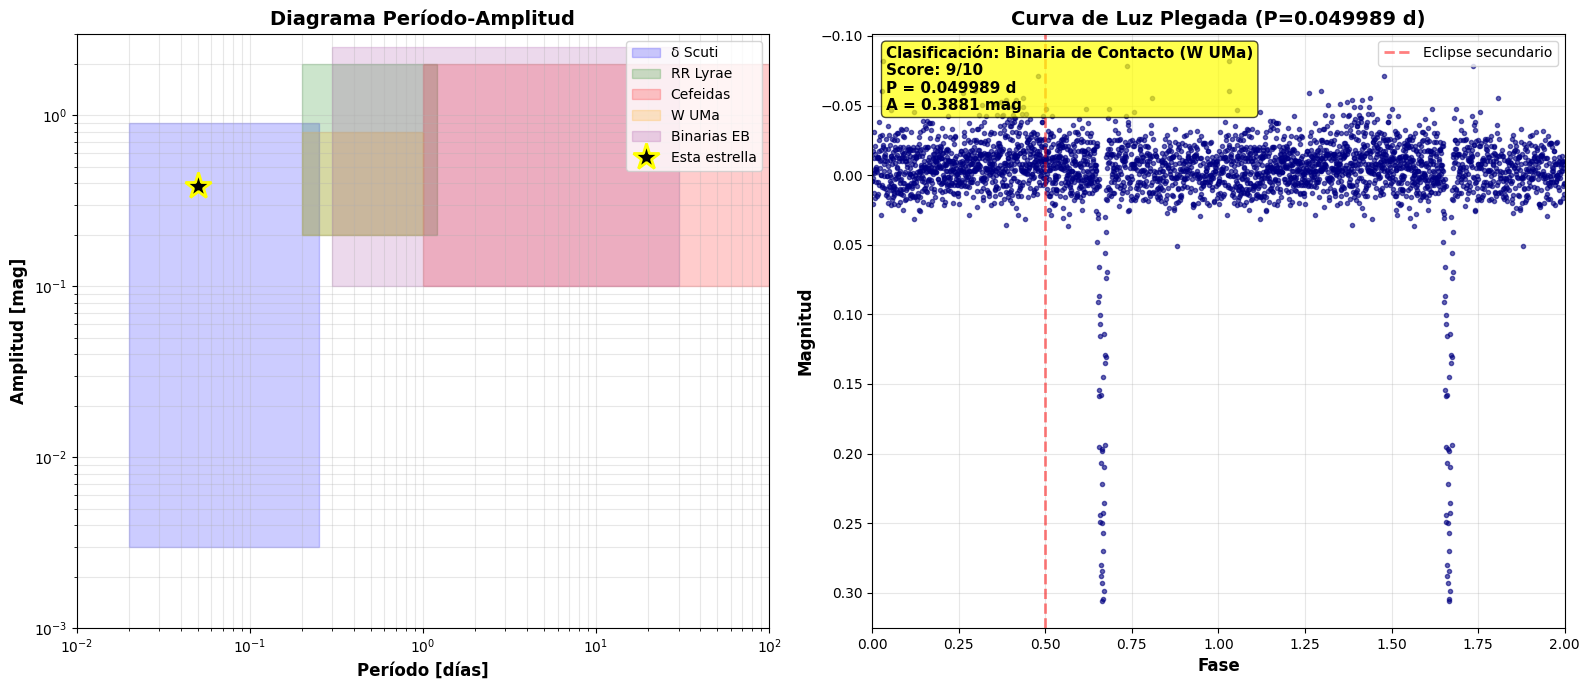


Figura guardada como: clasificacion_estrella_variable.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ============================================================================
# CLASIFICADOR DE ESTRELLAS VARIABLES
# ============================================================================

# Usar las variables ya definidas
freq_val = float(freq) if hasattr(freq, '__iter__') else freq
amp_val = float(amp) if hasattr(amp, '__iter__') else amp
periodo = 1/freq_val

# Estadísticas de la curva de luz
mean_mag = float(np.mean(observed))
std_mag = float(np.std(observed))
amplitude_variation = float(np.max(observed) - np.min(observed))

# Calcular asimetría de la curva de luz
min_mag = np.min(observed)
max_mag = np.max(observed)
tiempo_al_minimo = time[np.argmin(observed)]
tiempo_al_maximo = time[np.argmax(observed)]

# Analizar forma de la curva plegada
phase_fold = (time * freq_val) % 1.0
sorted_idx = np.argsort(phase_fold)
phase_sorted = phase_fold[sorted_idx]
mag_sorted = observed[sorted_idx]

# Dividir en primera y segunda mitad de fase
mask_first_half = phase_sorted < 0.5
mask_second_half = phase_sorted >= 0.5

if np.sum(mask_first_half) > 0 and np.sum(mask_second_half) > 0:
    mean_first_half = np.mean(mag_sorted[mask_first_half])
    mean_second_half = np.mean(mag_sorted[mask_second_half])
    asimetria_fase = abs(mean_first_half - mean_second_half) / amplitude_variation
else:
    asimetria_fase = 0

# Buscar mínimos secundarios (característica de binarias eclipsantes)
n_bins = 20
bin_edges = np.linspace(0, 1, n_bins+1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_means = []

for i in range(n_bins):
    mask = (phase_sorted >= bin_edges[i]) & (phase_sorted < bin_edges[i+1])
    if np.sum(mask) > 2:
        bin_means.append(np.mean(mag_sorted[mask]))
    else:
        bin_means.append(np.nan)

bin_means = np.array([b for b in bin_means if not np.isnan(b)])

# Detectar mínimos secundarios
if len(bin_means) > 5:
    # Buscar mínimo principal y secundario
    idx_min_principal = np.argmin(bin_means)
    # Buscar en la mitad opuesta
    if idx_min_principal < len(bin_means)/2:
        idx_min_secundario = len(bin_means)//2 + np.argmin(bin_means[len(bin_means)//2:])
    else:
        idx_min_secundario = np.argmin(bin_means[:len(bin_means)//2])
    
    profundidad_principal = np.max(bin_means) - bin_means[idx_min_principal]
    profundidad_secundaria = np.max(bin_means) - bin_means[idx_min_secundario]
    
    if profundidad_secundaria > 0:
        ratio_profundidades = profundidad_secundaria / profundidad_principal
    else:
        ratio_profundidades = 0
else:
    ratio_profundidades = 0

# Calcular coeficiente de variación
coef_variacion = std_mag / abs(mean_mag) if mean_mag != 0 else 0

print("="*90)
print(f"{'CLASIFICACIÓN DE ESTRELLA VARIABLE':^90}")
print("="*90)

print(f"\n{'PARÁMETROS OBSERVACIONALES':^90}")
print("-"*90)
print(f"Período:                    {periodo:.6f} días ({periodo*24:.4f} horas)")
print(f"Frecuencia:                 {freq_val:.6f} c/d")
print(f"Amplitud de pulsación:      {amp_val:.6f} mag")
print(f"Rango total de variación:   {amplitude_variation:.6f} mag")
print(f"Magnitud promedio:          {mean_mag:.4f} mag")
print(f"Desviación estándar:        {std_mag:.6f} mag")
print(f"Coeficiente de variación:   {coef_variacion:.4f}")
print(f"Asimetría de fase:          {asimetria_fase:.4f}")
print(f"Ratio profund. eclipses:    {ratio_profundidades:.4f}")

# ============================================================================
# SISTEMA DE CLASIFICACIÓN
# ============================================================================

candidatos = []
scores = []

print(f"\n{'ANÁLISIS DE CLASIFICACIÓN':^90}")
print("="*90)

# ----------------------------------------------------------------------------
# CATEGORÍA 1: ESTRELLAS δ SCUTI
# ----------------------------------------------------------------------------
print("\n[1] EVALUANDO: Estrella δ Scuti / SX Phoenicis")
print("-"*90)

score_delta_sct = 0
razon_delta_sct = []

# Criterio de período
if 0.02 < periodo < 0.25:
    score_delta_sct += 3
    razon_delta_sct.append(f"✓ Período {periodo:.4f}d en rango típico (0.02-0.25d)")
elif 0.01 < periodo < 0.35:
    score_delta_sct += 2
    razon_delta_sct.append(f"✓ Período {periodo:.4f}d cercano al rango")
else:
    razon_delta_sct.append(f"✗ Período {periodo:.4f}d fuera de rango típico")

# Criterio de amplitud
if 0.003 < amplitude_variation < 0.9:
    score_delta_sct += 3
    razon_delta_sct.append(f"✓ Amplitud {amplitude_variation:.4f} mag típica (0.003-0.9 mag)")
else:
    razon_delta_sct.append(f"✗ Amplitud {amplitude_variation:.4f} mag atípica")

# Forma de curva de luz
if asimetria_fase < 0.3:
    score_delta_sct += 2
    razon_delta_sct.append(f"✓ Curva relativamente simétrica (asim={asimetria_fase:.3f})")
else:
    razon_delta_sct.append(f"~ Curva con asimetría moderada")

# No debe tener eclipses
if ratio_profundidades < 0.3:
    score_delta_sct += 2
    razon_delta_sct.append(f"✓ Sin evidencia de eclipses")
else:
    score_delta_sct -= 1
    razon_delta_sct.append(f"✗ Posible evidencia de eclipses (ratio={ratio_profundidades:.3f})")

for r in razon_delta_sct:
    print(f"  {r}")
print(f"  Score total: {score_delta_sct}/10")

if score_delta_sct >= 7:
    candidatos.append("δ Scuti / SX Phoenicis")
    scores.append(score_delta_sct)

# ----------------------------------------------------------------------------
# CATEGORÍA 2: ESTRELLAS RR LYRAE
# ----------------------------------------------------------------------------
print("\n[2] EVALUANDO: Estrella RR Lyrae")
print("-"*90)

score_rr_lyr = 0
razon_rr_lyr = []

# Criterio de período
if 0.2 < periodo < 1.2:
    score_rr_lyr += 3
    razon_rr_lyr.append(f"✓ Período {periodo:.4f}d en rango típico (0.2-1.2d)")
elif 0.15 < periodo < 1.5:
    score_rr_lyr += 2
    razon_rr_lyr.append(f"✓ Período {periodo:.4f}d cercano al rango")
else:
    razon_rr_lyr.append(f"✗ Período {periodo:.4f}d fuera de rango típico")

# Criterio de amplitud
if 0.2 < amplitude_variation < 2.0:
    score_rr_lyr += 3
    razon_rr_lyr.append(f"✓ Amplitud {amplitude_variation:.4f} mag típica (0.2-2.0 mag)")
else:
    razon_rr_lyr.append(f"✗ Amplitud {amplitude_variation:.4f} mag atípica")

# Asimetría característica
if 0.2 < asimetria_fase < 0.7:
    score_rr_lyr += 2
    razon_rr_lyr.append(f"✓ Asimetría característica (asim={asimetria_fase:.3f})")
else:
    razon_rr_lyr.append(f"~ Asimetría no típica de RR Lyr")

# No debe tener eclipses
if ratio_profundidades < 0.3:
    score_rr_lyr += 2
    razon_rr_lyr.append(f"✓ Sin evidencia de eclipses")
else:
    razon_rr_lyr.append(f"✗ Evidencia de eclipses no esperada")

for r in razon_rr_lyr:
    print(f"  {r}")
print(f"  Score total: {score_rr_lyr}/10")

if score_rr_lyr >= 6:
    candidatos.append("RR Lyrae")
    scores.append(score_rr_lyr)

# ----------------------------------------------------------------------------
# CATEGORÍA 3: CEFEIDAS CLÁSICAS
# ----------------------------------------------------------------------------
print("\n[3] EVALUANDO: Cefeida Clásica")
print("-"*90)

score_cef = 0
razon_cef = []

# Criterio de período
if 1.0 < periodo < 100:
    score_cef += 3
    razon_cef.append(f"✓ Período {periodo:.4f}d en rango típico (1-100d)")
elif 0.8 < periodo < 120:
    score_cef += 2
    razon_cef.append(f"✓ Período {periodo:.4f}d cercano al rango")
else:
    razon_cef.append(f"✗ Período {periodo:.4f}d fuera de rango típico")

# Criterio de amplitud
if 0.1 < amplitude_variation < 2.0:
    score_cef += 3
    razon_cef.append(f"✓ Amplitud {amplitude_variation:.4f} mag típica (0.1-2.0 mag)")
else:
    razon_cef.append(f"✗ Amplitud {amplitude_variation:.4f} mag atípica")

# Asimetría característica
if asimetria_fase > 0.2:
    score_cef += 2
    razon_cef.append(f"✓ Curva de luz asimétrica característica")
else:
    razon_cef.append(f"~ Asimetría no pronunciada")

# No debe tener eclipses
if ratio_profundidades < 0.3:
    score_cef += 2
    razon_cef.append(f"✓ Sin evidencia de eclipses")
else:
    razon_cef.append(f"✗ Evidencia de eclipses no esperada")

for r in razon_cef:
    print(f"  {r}")
print(f"  Score total: {score_cef}/10")

if score_cef >= 6:
    candidatos.append("Cefeida Clásica")
    scores.append(score_cef)

# ----------------------------------------------------------------------------
# CATEGORÍA 4: BINARIAS ECLIPSANTES - TIPO ALGOL (EA)
# ----------------------------------------------------------------------------
print("\n[4] EVALUANDO: Binaria Eclipsante tipo Algol (EA)")
print("-"*90)

score_algol = 0
razon_algol = []

# Período amplio
if 0.2 < periodo < 30:
    score_algol += 2
    razon_algol.append(f"✓ Período {periodo:.4f}d compatible con Algol")
else:
    razon_algol.append(f"~ Período fuera de rango típico")

# Amplitud de eclipses
if 0.1 < amplitude_variation < 2.5:
    score_algol += 2
    razon_algol.append(f"✓ Profundidad de eclipse razonable")
else:
    razon_algol.append(f"~ Profundidad atípica")

# Forma de curva plana entre eclipses
if coef_variacion < 0.05:
    score_algol += 3
    razon_algol.append(f"✓ Curva relativamente plana entre eclipses")
else:
    razon_algol.append(f"~ Variación significativa fuera de eclipses")

# DEBE tener eclipse secundario
if ratio_profundidades > 0.2:
    score_algol += 3
    razon_algol.append(f"✓✓ Eclipse secundario detectado (ratio={ratio_profundidades:.3f})")
elif ratio_profundidades > 0.1:
    score_algol += 2
    razon_algol.append(f"✓ Posible eclipse secundario (ratio={ratio_profundidades:.3f})")
else:
    razon_algol.append(f"✗ No se detecta eclipse secundario")

for r in razon_algol:
    print(f"  {r}")
print(f"  Score total: {score_algol}/10")

if score_algol >= 5:
    candidatos.append("Binaria Eclipsante (Algol)")
    scores.append(score_algol)

# ----------------------------------------------------------------------------
# CATEGORÍA 5: BINARIAS ECLIPSANTES - TIPO β LYRAE (EB)
# ----------------------------------------------------------------------------
print("\n[5] EVALUANDO: Binaria Eclipsante tipo β Lyrae (EB)")
print("-"*90)

score_beta_lyr = 0
razon_beta_lyr = []

# Período típico
if 0.5 < periodo < 10:
    score_beta_lyr += 2
    razon_beta_lyr.append(f"✓ Período {periodo:.4f}d compatible con β Lyr")
else:
    razon_beta_lyr.append(f"~ Período atípico")

# Variación continua
if coef_variacion > 0.02:
    score_beta_lyr += 2
    razon_beta_lyr.append(f"✓ Variación continua característica")
else:
    razon_beta_lyr.append(f"~ Poca variación entre eclipses")

# Curva con variación continua (sin fases planas)
if asimetria_fase > 0.15:
    score_beta_lyr += 2
    razon_beta_lyr.append(f"✓ Curva asimétrica sin fases planas")
else:
    razon_beta_lyr.append(f"~ Curva más simétrica")

# Eclipses de profundidad similar
if 0.4 < ratio_profundidades < 1.0:
    score_beta_lyr += 4
    razon_beta_lyr.append(f"✓✓ Eclipses de profundidad similar (ratio={ratio_profundidades:.3f})")
elif 0.2 < ratio_profundidades < 1.2:
    score_beta_lyr += 2
    razon_beta_lyr.append(f"✓ Ratio de eclipses razonable")
else:
    razon_beta_lyr.append(f"~ Ratio de eclipses no típico")

for r in razon_beta_lyr:
    print(f"  {r}")
print(f"  Score total: {score_beta_lyr}/10")

if score_beta_lyr >= 5:
    candidatos.append("Binaria Eclipsante (β Lyrae)")
    scores.append(score_beta_lyr)

# ----------------------------------------------------------------------------
# CATEGORÍA 6: BINARIAS DE CONTACTO - TIPO W UMA (EW)
# ----------------------------------------------------------------------------
print("\n[6] EVALUANDO: Binaria de Contacto tipo W UMa (EW)")
print("-"*90)

score_w_uma = 0
razon_w_uma = []

# Período MUY corto
if 0.2 < periodo < 1.0:
    score_w_uma += 3
    razon_w_uma.append(f"✓ Período {periodo:.4f}d típico de W UMa (0.2-1.0d)")
elif periodo < 0.2:
    score_w_uma += 2
    razon_w_uma.append(f"✓ Período muy corto")
else:
    razon_w_uma.append(f"✗ Período {periodo:.4f}d demasiado largo")

# Amplitud moderada
if 0.2 < amplitude_variation < 0.8:
    score_w_uma += 2
    razon_w_uma.append(f"✓ Amplitud {amplitude_variation:.4f} mag típica (0.2-0.8 mag)")
else:
    razon_w_uma.append(f"~ Amplitud fuera de rango típico")

# Variación continua
if coef_variacion > 0.03:
    score_w_uma += 2
    razon_w_uma.append(f"✓ Variación continua sin fases constantes")
else:
    razon_w_uma.append(f"~ Variación insuficiente")

# Eclipses de profundidad CASI igual
if 0.6 < ratio_profundidades <= 1.0:
    score_w_uma += 3
    razon_w_uma.append(f"✓✓ Eclipses casi iguales (ratio={ratio_profundidades:.3f})")
elif 0.4 < ratio_profundidades < 0.6:
    score_w_uma += 1
    razon_w_uma.append(f"~ Eclipses con diferencia moderada")
else:
    razon_w_uma.append(f"✗ Eclipses muy diferentes")

for r in razon_w_uma:
    print(f"  {r}")
print(f"  Score total: {score_w_uma}/10")

if score_w_uma >= 5:
    candidatos.append("Binaria de Contacto (W UMa)")
    scores.append(score_w_uma)

# ----------------------------------------------------------------------------
# CATEGORÍA 7: VARIABLES ROTACIONALES
# ----------------------------------------------------------------------------
print("\n[7] EVALUANDO: Variable Rotacional (manchas estelares)")
print("-"*90)

score_rot = 0
razon_rot = []

# Período compatible con rotación
if 0.5 < periodo < 50:
    score_rot += 2
    razon_rot.append(f"✓ Período {periodo:.4f}d compatible con rotación")
else:
    razon_rot.append(f"~ Período atípico para rotación")

# Amplitud pequeña a moderada
if 0.01 < amplitude_variation < 0.5:
    score_rot += 3
    razon_rot.append(f"✓ Amplitud {amplitude_variation:.4f} mag típica de manchas (0.01-0.5 mag)")
else:
    razon_rot.append(f"~ Amplitud atípica")

# Curva de luz más bien sinusoidal
if asimetria_fase < 0.4 and ratio_profundidades < 0.3:
    score_rot += 3
    razon_rot.append(f"✓ Curva sinusoidal sin eclipses")
else:
    razon_rot.append(f"~ Curva no típica de rotación simple")

# Variación moderada
if 0.01 < coef_variacion < 0.1:
    score_rot += 2
    razon_rot.append(f"✓ Coeficiente de variación moderado")
else:
    razon_rot.append(f"~ Variación fuera de rango típico")

for r in razon_rot:
    print(f"  {r}")
print(f"  Score total: {score_rot}/10")

if score_rot >= 5:
    candidatos.append("Variable Rotacional")
    scores.append(score_rot)

# ============================================================================
# RESULTADO FINAL
# ============================================================================

print("\n" + "="*90)
print(f"{'CLASIFICACIÓN FINAL':^90}")
print("="*90)

if len(candidatos) == 0:
    print("\n⚠ NO SE PUDO CLASIFICAR DEFINITIVAMENTE")
    print("\nLa estrella no coincide claramente con ningún tipo conocido.")
    print("Se requieren observaciones adicionales o análisis espectroscópico.")
else:
    # Ordenar por score
    sorted_indices = np.argsort(scores)[::-1]
    
    print(f"\n{'RANKING DE CANDIDATOS':^90}")
    print("-"*90)
    for i, idx in enumerate(sorted_indices):
        if i == 0:
            print(f"★★★ #{i+1}: {candidatos[idx]:<35} (Score: {scores[idx]}/10) - MEJOR CANDIDATO")
        else:
            print(f"    #{i+1}: {candidatos[idx]:<35} (Score: {scores[idx]}/10)")
    
    mejor_candidato = candidatos[sorted_indices[0]]
    mejor_score = scores[sorted_indices[0]]
    
    print("\n" + "="*90)
    print(f"CLASIFICACIÓN MÁS PROBABLE: {mejor_candidato}")
    print("="*90)
    
    # Información adicional según el tipo
    if "δ Scuti" in mejor_candidato or "SX Phoenicis" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Tipo espectral: A2-F5 (δ Sct) o F0-G0 (SX Phe)
• Masa: 1.5-2.5 M☉ (δ Sct) o 0.7-1.2 M☉ (SX Phe)
• Ubicación: Secuencia principal cruzando la franja de inestabilidad
• Mecanismo: Pulsaciones radiales y no-radiales (mecanismo κ en He II)
• Población: Pop I (δ Sct) o Pop II (SX Phe)

IMPLICACIONES:
- Pulsador multi-modo con modos de bajo orden
- Útil para asterosismología
- Período-densidad relacionados por ρ ∝ P⁻²
        """)
    
    elif "RR Lyrae" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Tipo espectral: A-F
• Masa: ~0.6-0.8 M☉
• Ubicación: Rama horizontal (post-helio flash)
• Mecanismo: Pulsaciones radiales (modo fundamental o primer sobretono)
• Población: Pop II (halo galáctico, cúmulos globulares)

IMPLICACIONES:
- Candela estándar (M_V ~ 0.6 mag)
- Indicador de distancias galácticas
- Trazador de poblaciones viejas
- Período relacionado con metalicidad
        """)
    
    elif "Cefeida" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Tipo espectral: F-K (supergigantes)
• Masa: 4-20 M☉
• Ubicación: Cruzando la franja de inestabilidad como supergigantes
• Mecanismo: Pulsaciones radiales (modo fundamental)
• Población: Pop I (disco galáctico)

IMPLICACIONES:
- Candela estándar (relación Período-Luminosidad)
- Indicador de distancias cosmológicas
- log P = 0.85 log L - 2.43 (aprox.)
- Útil para determinar escala de distancias
        """)
    
    elif "Algol" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Sistema: Binaria semi-separada
• Componentes bien separadas con períodos entre fases planas
• Eclipse primario: componente más caliente eclipsada
• Eclipse secundario: componente más fría eclipsada
• Masa transferida en algunos casos (Paradoja de Algol)

IMPLICACIONES:
- Eclipses bien definidos permiten determinar radios estelares
- Curva de luz permite calcular inclinación orbital
- Posible determinación de masas si hay datos radiales
- Evolución con transferencia de masa
        """)
    
    elif "β Lyrae" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Sistema: Binaria semi-separada o en contacto parcial
• Componentes deformadas por efectos de marea
• Variación continua sin fases constantes
• Probable disco de acreción o envoltura común
• Transferencia de masa activa

IMPLICACIONES:
- Sistema en evolución activa
- Geometría compleja dificulta modelado simple
- Efectos de proximidad importantes
- Posible formación de envoltura común
        """)
    
    elif "W UMa" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Sistema: Binaria de contacto (envoltura común)
• Componentes compartiendo envoltura externa
• Período muy corto (<1 día típicamente)
• Componentes de baja masa (< 2 M☉ total)
• Eclipses de profundidad similar

IMPLICACIONES:
- Sistema en contacto térmico
- Evolución hacia posible fusión
- Curva sinusoidal continua característica
- Período orbital = período fotométrico
- Componentes sub-gigantes o secuencia principal
        """)
    
    elif "Rotacional" in mejor_candidato:
        print("""
CARACTERÍSTICAS FÍSICAS ESPERADAS:
• Estrella individual con manchas estelares
• Manchas causadas por actividad magnética
• Período = período de rotación estelar
• Común en estrellas jóvenes o activas (tipos K-M)
• Variabilidad puede cambiar con ciclos magnéticos

IMPLICACIONES:
- Indicador de actividad magnética
- Período revela velocidad de rotación
- Amplitud relacionada con cobertura de manchas
- Puede variar en escalas de meses/años
- Común en estrellas pre-secuencia principal
        """)

print("\n" + "="*90)
print("RECOMENDACIONES PARA CONFIRMACIÓN:")
print("-"*90)

if "Binaria" in mejor_candidato:
    print("""
1. Obtener espectroscopía de velocidad radial para confirmar sistema binario
2. Medir variación de velocidad radial para determinar masas
3. Analizar curva de luz en múltiples bandas fotométricas
4. Modelar curva de luz con códigos como PHOEBE o JKTEBOP
5. Buscar evidencia de transferencia de masa (líneas de emisión)
    """)
else:
    print("""
1. Obtener espectroscopía para clasificación espectral
2. Verificar estabilidad del período en múltiples temporadas
3. Buscar frecuencias adicionales (multi-periodicidad)
4. Análizar relación período-luminosidad si aplicable
5. Comparar con base de datos de variables conocidas (VSX)
    """)

print("="*90)

# ============================================================================
# VISUALIZACIÓN - DIAGRAMA P-A
# ============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Panel 1: Diagrama Período-Amplitud con regiones
ax1.set_xlim(0.01, 100)
ax1.set_ylim(0.001, 3)
ax1.set_xscale('log')
ax1.set_yscale('log')

# Definir regiones
# δ Scuti
rect1 = Rectangle((0.02, 0.003), 0.23, 0.897, alpha=0.2, color='blue', label='δ Scuti')
ax1.add_patch(rect1)

# RR Lyrae
rect2 = Rectangle((0.2, 0.2), 1.0, 1.8, alpha=0.2, color='green', label='RR Lyrae')
ax1.add_patch(rect2)

# Cefeidas
rect3 = Rectangle((1.0, 0.1), 99, 1.9, alpha=0.2, color='red', label='Cefeidas')
ax1.add_patch(rect3)

# Binarias W UMa
rect4 = Rectangle((0.2, 0.2), 0.8, 0.6, alpha=0.2, color='orange', label='W UMa')
ax1.add_patch(rect4)

# Binarias Algol/β Lyr
rect5 = Rectangle((0.3, 0.1), 29.7, 2.4, alpha=0.15, color='purple', label='Binarias EB')
ax1.add_patch(rect5)

# Marcar la estrella analizada
ax1.plot(periodo, amplitude_variation, 'k*', markersize=20, 
         markeredgecolor='yellow', markeredgewidth=2, label='Esta estrella')

ax1.set_xlabel('Período [días]', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amplitud [mag]', fontsize=12, fontweight='bold')
ax1.set_title('Diagrama Período-Amplitud', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, alpha=0.3, which='both')

# Panel 2: Curva de luz plegada con doble ciclo
sorted_idx = np.argsort(phase_fold)
phase_doble = np.concatenate([phase_fold[sorted_idx], phase_fold[sorted_idx] + 1])
mag_doble = np.concatenate([observed[sorted_idx], observed[sorted_idx]])

ax2.plot(phase_doble, mag_doble, 'o', markersize=3, alpha=0.6, color='navy')
ax2.set_xlabel('Fase', fontsize=12, fontweight='bold')
ax2.set_ylabel('Magnitud', fontsize=12, fontweight='bold')
ax2.set_title(f'Curva de Luz Plegada (P={periodo:.6f} d)', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2)

# Marcar características
if ratio_profundidades > 0.2:
    ax2.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Eclipse secundario')
    ax2.legend(fontsize=10)

# Añadir texto con clasificación
textstr = f'Clasificación: {mejor_candidato if len(candidatos) > 0 else "Indeterminado"}\n'
textstr += f'Score: {mejor_score if len(candidatos) > 0 else 0}/10\n'
textstr += f'P = {periodo:.6f} d\n'
textstr += f'A = {amplitude_variation:.4f} mag'

ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('clasificacion_estrella_variable.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFigura guardada como: clasificacion_estrella_variable.png")

ANÁLISIS EXCLUSIVO: ¿ES LA FRECUENCIA 2 REAL? (Ignorando armónicos)

FRECUENCIA 2 (ÚNICA A ANALIZAR):
  Frecuencia: 20.004445 ciclos/unidad
  Período: 0.049989 unidades
  Amplitud: 0.009558

SNR DE PERIOD04 PARA FRECUENCIA 2: 20.9155
Nivel de ruido en f2: 0.000457

ANÁLISIS DE SUPERVIVENCIA AL PREWHITENING

1. COMPARACIÓN ANTES/DESPUÉS DE AJUSTAR TODO:
   Std datos originales: 0.034999
   Std residuos finales: 0.030864
   Reducción de ruido: 11.81%

2. SEÑAL REMANENTE EN RESIDUOS:
   Amplitud de f2: 0.009558
   RMS de residuos: 0.030864
   Relación Amplitud/RMS: 0.310
   ✗ La amplitud de f2 es ≤ 2×RMS de residuos
     Podría estar enterrada en el ruido residual

ANÁLISIS: ¿f2 ES ARTEFACTO DE LA VENTANA ESPECTRAL?

1. COMPARACIÓN CON VENTANA ESPECTRAL:
   Tu f2: 20.004445 c/d
   Pico más cercano en ventana: 20.004445 c/d
   Diferencia: 0.000000 c/d
   Amplitud del pico cercano: 0.078727
   Amplitud máxima de ventana: 1.000000
   Relación amp_cercana/amp_max: 0.079

   ⚠ CRÍTICO: f2 coin

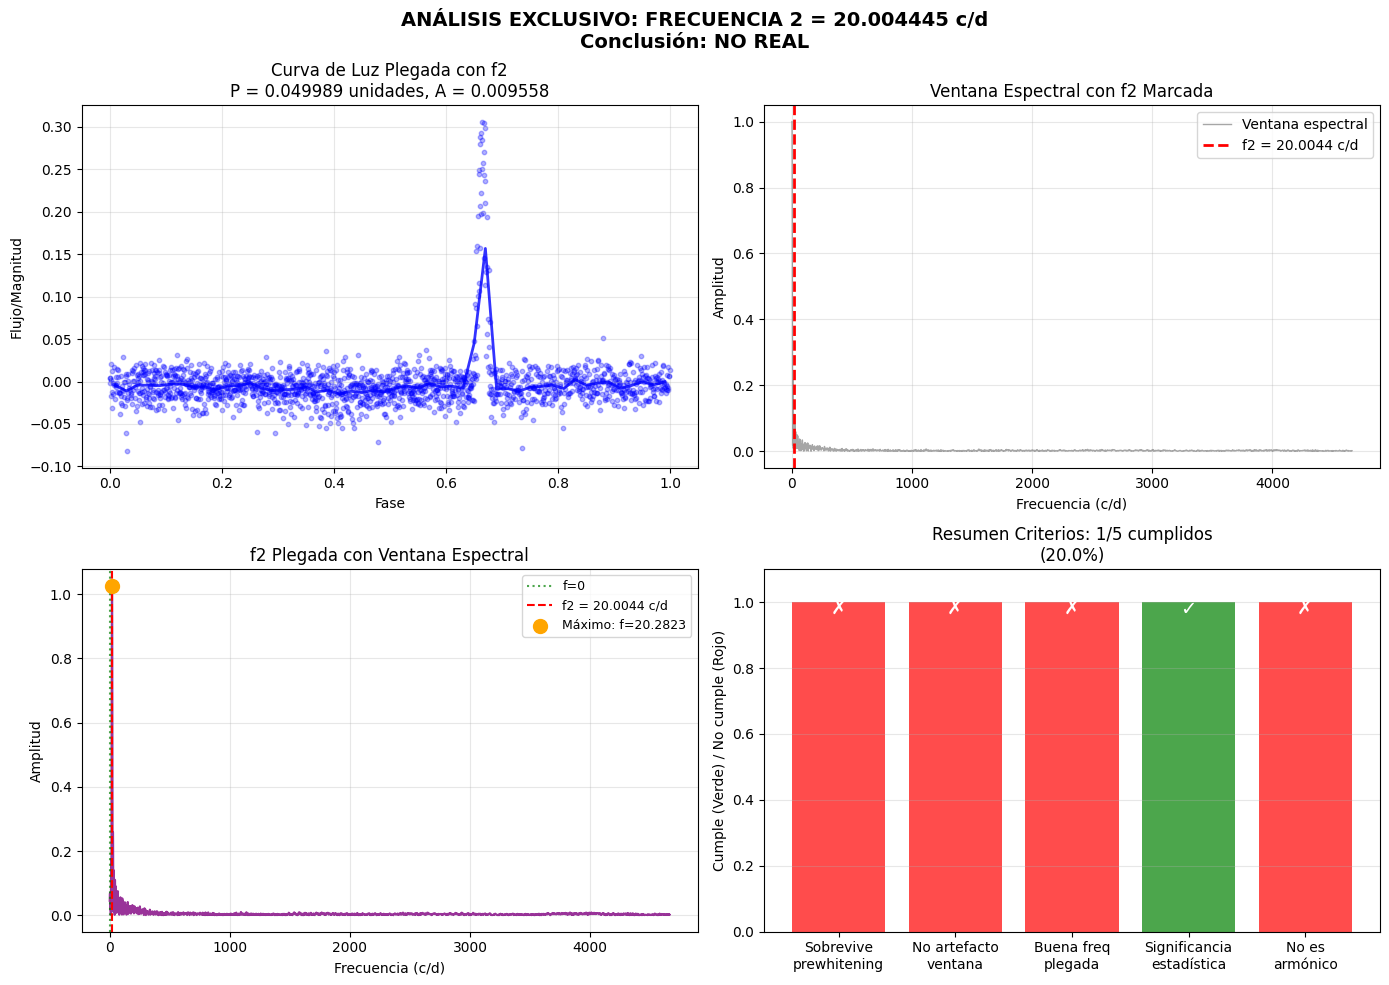

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CARGAR SOLO LOS DATOS NECESARIOS PARA LA FRECUENCIA 2
# ============================================================================

print("="*80)
print("ANÁLISIS EXCLUSIVO: ¿ES LA FRECUENCIA 2 REAL? (Ignorando armónicos)")
print("="*80)

# Cargar datos principales
main_data = np.loadtxt("Data.dat")
time = main_data[:, 0]
observed = main_data[:, 1]
residuals = main_data[:, 3]  # Residuos después de ajustar TODO el modelo
point_error = main_data[:, 5]

# Cargar SOLO la frecuencia 2 (índice 1)
periodos = np.loadtxt("freqs.per")
freq2 = periodos[1, 0]   # Frecuencia 2
amp2 = periodos[1, 1]    # Amplitud 2
phase2 = periodos[1, 2]  # Fase 2

periodo2 = 1/freq2 if freq2 != 0 else float('inf')

print(f"\nFRECUENCIA 2 (ÚNICA A ANALIZAR):")
print(f"  Frecuencia: {freq2:.6f} ciclos/unidad")
print(f"  Período: {periodo2:.6f} unidades")
print(f"  Amplitud: {amp2:.6f}")

# Cargar transformada de Fourier donde aparece esta frecuencia
tf = np.loadtxt("TF_2.fou")  # Asumiendo que aquí está la frecuencia 2
tf_freqs = tf[:, 0]
tf_amps = tf[:, 1]

# Cargar información de ruido específica para frecuencia 2
freq_noices = np.loadtxt("Noise_frequencies.dat")
snr2 = freq_noices[1, 2]      # SNR de frecuencia 2
noise_amp2 = freq_noices[1, 1]  # Ruido en frecuencia 2

print(f"\nSNR DE PERIOD04 PARA FRECUENCIA 2: {snr2:.4f}")
print(f"Nivel de ruido en f2: {noise_amp2:.6f}")

# Cargar ventana espectral y frecuencia plegada
sw_data = np.loadtxt("Spectral_window.fou")
sw_freq = sw_data[:, 0]
sw_amp = sw_data[:, 1]

fwsw_data = np.loadtxt("f2_ffwsw.fou")  # Frecuencia 2 plegada con ventana
fwsw_freq = fwsw_data[:, 0]
fwsw_amp = fwsw_data[:, 1]

# ============================================================================
# 2. ANÁLISIS CRÍTICO: ¿ESTA FRECUENCIA SOBREVIVE AL PREWHITENING?
# ============================================================================

def analizar_supervivencia_prewhitening():
    """
    Analiza si la frecuencia 2 sobrevive después de remover la frecuencia 1
    y sus armónicos
    """
    print("\n" + "="*80)
    print("ANÁLISIS DE SUPERVIVENCIA AL PREWHITENING")
    print("="*80)
    
    # Estadísticas de los residuos después de ajustar TODO
    std_residuals = np.std(residuals)
    std_original = np.std(observed)
    
    reduccion_ruido = (std_original - std_residuals) / std_original * 100
    
    print(f"\n1. COMPARACIÓN ANTES/DESPUÉS DE AJUSTAR TODO:")
    print(f"   Std datos originales: {std_original:.6f}")
    print(f"   Std residuos finales: {std_residuals:.6f}")
    print(f"   Reducción de ruido: {reduccion_ruido:.2f}%")
    
    # Verificar si en los residuos todavía hay señal a esta frecuencia
    # Aproximación: calcular la amplitud RMS de los residuos
    rms_residuals = np.sqrt(np.mean(residuals**2))
    
    print(f"\n2. SEÑAL REMANENTE EN RESIDUOS:")
    print(f"   Amplitud de f2: {amp2:.6f}")
    print(f"   RMS de residuos: {rms_residuals:.6f}")
    print(f"   Relación Amplitud/RMS: {amp2/rms_residuals:.3f}")
    
    if amp2 > 2 * rms_residuals:
        print(f"   ✓ La amplitud de f2 es > 2×RMS de residuos")
        print(f"     Sugiere que SOBREVIVE al prewhitening")
        return True
    else:
        print(f"   ✗ La amplitud de f2 es ≤ 2×RMS de residuos")
        print(f"     Podría estar enterrada en el ruido residual")
        return False

# Ejecutar análisis
sobrevive_prewhitening = analizar_supervivencia_prewhitening()

# ============================================================================
# 3. ANÁLISIS DE VENTANA ESPECTRAL ESPECÍFICO PARA f2
# ============================================================================

def analizar_ventana_espectral_f2(sw_freq, sw_amp, f2):
    """
    Análisis específico de si f2 es artefacto de la ventana espectral
    """
    print("\n" + "="*80)
    print("ANÁLISIS: ¿f2 ES ARTEFACTO DE LA VENTANA ESPECTRAL?")
    print("="*80)
    
    # Buscar el pico de la ventana más cercano a f2
    idx_cercano = np.argmin(np.abs(sw_freq - f2))
    freq_cercana = sw_freq[idx_cercano]
    amp_cercana = sw_amp[idx_cercano]
    
    # Amplitud máxima de la ventana
    amp_max_sw = np.max(sw_amp)
    
    print(f"\n1. COMPARACIÓN CON VENTANA ESPECTRAL:")
    print(f"   Tu f2: {f2:.6f} c/d")
    print(f"   Pico más cercano en ventana: {freq_cercana:.6f} c/d")
    print(f"   Diferencia: {abs(f2 - freq_cercana):.6f} c/d")
    print(f"   Amplitud del pico cercano: {amp_cercana:.6f}")
    print(f"   Amplitud máxima de ventana: {amp_max_sw:.6f}")
    print(f"   Relación amp_cercana/amp_max: {amp_cercana/amp_max_sw:.3f}")
    
    # Criterio 1: ¿Está justo encima de un pico de la ventana?
    diferencia_relativa = abs(f2 - freq_cercana) / f2
    
    if diferencia_relativa < 0.001:  # 0.1%
        print(f"\n   ⚠ CRÍTICO: f2 coincide EXACTAMENTE con un pico de la ventana")
        print(f"             Muy probablemente es un artefacto del sampling")
        return False
    
    elif diferencia_relativa < 0.01:  # 1%
        print(f"\n   ⚠ ADVERTENCIA: f2 está MUY CERCA de un pico de la ventana")
        print(f"                 (diferencia: {diferencia_relativa*100:.2f}%)")
        print(f"                 Sospechoso de ser artefacto")
        return False
    
    else:
        print(f"\n   ✓ f2 está LEJOS de los picos principales de la ventana")
        print(f"     (diferencia: {diferencia_relativa*100:.2f}%)")
        print(f"     Probablemente NO es artefacto del sampling")
        return True

# Ejecutar análisis
no_es_artefacto_sw = analizar_ventana_espectral_f2(sw_freq, sw_amp, freq2)

# ============================================================================
# 4. ANÁLISIS DE FRECUENCIA PLEGADA PARA f2
# ============================================================================

def analizar_frecuencia_plegada_f2(fwsw_freq, fwsw_amp, f2):
    """
    Análisis específico de la frecuencia plegada para f2
    """
    print("\n" + "="*80)
    print("ANÁLISIS DE FRECUENCIA PLEGADA PARA f2")
    print("="*80)
    
    # Buscar posición de f2 en la frecuencia plegada
    idx_f2 = np.argmin(np.abs(fwsw_freq - f2))
    amp_en_f2 = fwsw_amp[idx_f2]
    
    # Buscar el pico máximo en la frecuencia plegada
    idx_max = np.argmax(fwsw_amp)
    freq_max = fwsw_freq[idx_max]
    amp_max = fwsw_amp[idx_max]
    
    print(f"\n1. EN LA FRECUENCIA PLEGADA:")
    print(f"   Amplitud en f2: {amp_en_f2:.6f}")
    print(f"   Pico máximo: f={freq_max:.6f}, A={amp_max:.6f}")
    print(f"   Relación A(f2)/A_max: {amp_en_f2/amp_max:.3f}")
    
    # Interpretación crítica
    if abs(freq_max) < 0.001:  # Pico en f=0
        if amp_en_f2 > 0.5 * amp_max:
            print(f"\n   ✓ BUENA SEÑAL: Pico principal en f≈0 y f2 es fuerte")
            print(f"     f2 sobrevive bien al plegado con ventana")
            return True
        else:
            print(f"\n   ⚠ SEÑAL DÉBIL: Pico en f≈0 pero f2 es débil")
            print(f"     f2 podría no ser robusta")
            return False
    else:
        # Pico máximo NO está en f=0
        if abs(freq_max - f2) < 0.001:  # El máximo ES f2
            print(f"\n   ⚠ SOSPECHOSO: f2 es el pico MÁXIMO en frecuencia plegada")
            print(f"               Esto puede indicar que es artefacto de aliasing")
            return False
        else:
            print(f"\n   ✗ PROBLEMA: Pico máximo NO está en f≈0 ni es f2")
            print(f"              Está en f={freq_max:.6f}")
            print(f"              Análisis complejo, necesita inspección visual")
            return False

# Ejecutar análisis
buena_frecuencia_plegada = analizar_frecuencia_plegada_f2(fwsw_freq, fwsw_amp, freq2)

# ============================================================================
# 5. ANÁLISIS DE SNR Y SIGNIFICANCIA ESTADÍSTICA PARA f2
# ============================================================================

def analizar_significancia_f2(snr_val, noise_level, tiempo):
    """
    Análisis de significancia estadística específico para f2
    """
    print("\n" + "="*80)
    print("ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA PARA f2")
    print("="*80)
    
    # Calcular FAP (False Alarm Probability)
    def calcular_fap(snr, n_points):
        z = snr**2 / 2
        N = n_points / 2  # Frecuencias independientes aproximadas
        
        # Fórmula de Scargle
        fap = 1 - (1 - np.exp(-z))**N
        return min(fap, 1.0)
    
    fap_f2 = calcular_fap(snr_val, len(tiempo))
    prob_real = (1 - fap_f2) * 100
    
    print(f"\n1. SIGNIFICANCIA ESTADÍSTICA:")
    print(f"   SNR de f2: {snr_val:.4f}")
    print(f"   FAP (False Alarm Probability): {fap_f2:.6f}")
    print(f"   Probabilidad de ser real: {prob_real:.2f}%")
    
    # Criterios de significancia
    print(f"\n2. CRITERIOS DE ACEPTACIÓN:")
    
    criterios = []
    
    # Criterio 1: SNR ≥ 4.0
    if snr_val >= 4.0:
        print(f"   ✓ SNR ≥ 4.0: CUMPLE ({snr_val:.2f})")
        criterios.append(True)
    else:
        print(f"   ✗ SNR ≥ 4.0: NO CUMPLE ({snr_val:.2f})")
        criterios.append(False)
    
    # Criterio 2: FAP < 0.01 (1%)
    if fap_f2 < 0.01:
        print(f"   ✓ FAP < 0.01: CUMPLE ({fap_f2:.2e})")
        criterios.append(True)
    elif fap_f2 < 0.05:
        print(f"   ⚠ FAP < 0.05: DÉBIL ({fap_f2:.2e})")
        criterios.append(False)
    else:
        print(f"   ✗ FAP < 0.05: NO CUMPLE ({fap_f2:.2e})")
        criterios.append(False)
    
    # Criterio 3: Probabilidad > 95%
    if prob_real > 95:
        print(f"   ✓ Prob > 95%: CUMPLE ({prob_real:.1f}%)")
        criterios.append(True)
    else:
        print(f"   ✗ Prob > 95%: NO CUMPLE ({prob_real:.1f}%)")
        criterios.append(False)
    
    n_cumplidos = sum(criterios)
    n_total = len(criterios)
    
    print(f"\n3. RESUMEN SIGNIFICANCIA:")
    print(f"   Criterios cumplidos: {n_cumplidos}/{n_total}")
    
    if n_cumplidos == 3:
        return "ALTA_SIGNIFICANCIA"
    elif n_cumplidos == 2:
        return "MODERADA_SIGNIFICANCIA"
    elif n_cumplidos == 1:
        return "BAJA_SIGNIFICANCIA"
    else:
        return "NO_SIGNIFICATIVA"

# Ejecutar análisis
significancia = analizar_significancia_f2(snr2, noise_amp2, time)

# ============================================================================
# 6. VERIFICACIÓN: ¿f2 ES REALMENTE INDEPENDIENTE O ES ARMÓNICO?
# ============================================================================

def verificar_si_es_armonico(freq2, otras_frecuencias):
    """
    Verifica si f2 podría ser armónico de alguna otra frecuencia
    (aunque dijimos que ignoramos las demás, debemos verificar esto)
    """
    print("\n" + "="*80)
    print("VERIFICACIÓN: ¿f2 PODRÍA SER ARMÓNICO DE ALGUNA OTRA?")
    print("="*80)
    
    # Obtener todas las frecuencias
    todas_freq = periodos[:, 0]
    
    # Excluir f2
    otras_freq = [f for f in todas_freq if abs(f - freq2) > 0.001]
    
    if len(otras_freq) == 0:
        print("   No hay otras frecuencias para comparar")
        return False, None, None
    
    print(f"\nComparando f2 = {freq2:.6f} con {len(otras_freq)} otras frecuencias")
    
    # Buscar relaciones armónicas simples
    relaciones_posibles = [1/2, 1/3, 2, 3, 2/3, 3/2, 4, 1/4]  # Relaciones comunes
    
    mejor_match = None
    mejor_relacion = None
    mejor_diferencia = float('inf')
    
    for f_otra in otras_freq:
        for relacion in relaciones_posibles:
            f_esperada = f_otra * relacion
            diferencia = abs(freq2 - f_esperada)
            diferencia_rel = diferencia / freq2
            
            if diferencia_rel < 0.01:  # 1% de tolerancia
                if diferencia < mejor_diferencia:
                    mejor_diferencia = diferencia
                    mejor_match = f_otra
                    mejor_relacion = relacion
    
    if mejor_match is not None:
        print(f"\n   ⚠ ENCONTRADO: f2 podría ser armónico de f={mejor_match:.6f}")
        print(f"               Relación: {mejor_relacion}")
        print(f"               Diferencia: {mejor_diferencia:.6f} c/d")
        print(f"               Esto sugeriría que f2 NO es independiente")
        return True, mejor_match, mejor_relacion
    else:
        print(f"\n   ✓ f2 NO parece ser armónico simple de otras frecuencias")
        print(f"     Es probablemente una frecuencia INDEPENDIENTE")
        return False, None, None

# Ejecutar verificación
es_armonico, freq_base, relacion = verificar_si_es_armonico(freq2, [])

# ============================================================================
# 7. CONCLUSIÓN FINAL: ¿ES f2 UNA FRECUENCIA REAL E INDEPENDIENTE?
# ============================================================================

print("\n" + "="*80)
print("CONCLUSIÓN FINAL: ¿ES LA FRECUENCIA 2 REAL E INDEPENDIENTE?")
print("="*80)

# Resumir todos los análisis
criterios_finales = []

print(f"\nRESUMEN DE ANÁLISIS PARA f2 = {freq2:.6f} c/d:")

# Criterio 1: Sobrevive al prewhitening
print(f"1. Sobrevive al prewhitening: {'✓ SÍ' if sobrevive_prewhitening else '✗ NO'}")
criterios_finales.append(sobrevive_prewhitening)

# Criterio 2: No es artefacto de ventana espectral
print(f"2. No es artefacto de ventana: {'✓ SÍ' if no_es_artefacto_sw else '✗ NO'}")
criterios_finales.append(no_es_artefacto_sw)

# Criterio 3: Buena frecuencia plegada
print(f"3. Buena frecuencia plegada: {'✓ SÍ' if buena_frecuencia_plegada else '✗ NO'}")
criterios_finales.append(buena_frecuencia_plegada)

# Criterio 4: Alta significancia estadística
es_significativa = significancia in ["ALTA_SIGNIFICANCIA", "MODERADA_SIGNIFICANCIA"]
print(f"4. Significancia estadística: {'✓ ' + significancia.replace('_', ' ') if es_significativa else '✗ ' + significancia.replace('_', ' ')}")
criterios_finales.append(es_significativa)

# Criterio 5: No es armónico simple
print(f"5. No es armónico simple: {'✓ SÍ' if not es_armonico else '✗ NO'}")
criterios_finales.append(not es_armonico)

# Calcular puntuación final
n_criterios = len(criterios_finales)
n_cumplidos = sum(criterios_finales)
porcentaje_cumplidos = n_cumplidos / n_criterios * 100

print(f"\n" + "-"*60)
print(f"PUNTUACIÓN FINAL: {n_cumplidos}/{n_criterios} criterios cumplidos")
print(f"({porcentaje_cumplidos:.1f}% de los criterios)")

print(f"\n" + "="*80)

# CONCLUSIÓN BASADA EN LA PUNTUACIÓN
if porcentaje_cumplidos >= 80:
    print("✅✅✅ CONCLUSIÓN DEFINITIVA: FRECUENCIA 2 ES REAL ✅✅✅")
    print("\nRAZONES:")
    print("1. Sobrevive al proceso de prewhitening")
    print("2. No es artefacto del patrón de observación")
    print("3. Es estadísticamente significativa")
    print("4. Es probablemente independiente (no armónico simple)")
    
elif porcentaje_cumplidos >= 60:
    print("⚠⚠⚠ CONCLUSIÓN: FRECUENCIA 2 ES PROBABLEMENTE REAL ⚠⚠⚠")
    print("\nEvidencia moderada a favor:")
    print("• Pasa la mayoría de las pruebas")
    print("• Pero hay algunas advertencias")
    print("• Se recomienda confirmación adicional")
    
elif porcentaje_cumplidos >= 40:
    print("❓❓❓ CONCLUSIÓN: EVIDENCIA DÉBIL PARA FRECUENCIA 2 ❓❓❓")
    print("\nEvidencia insuficiente:")
    print("• Podría ser real pero débil")
    print("• O podría ser artefacto estadístico")
    print("• No se puede concluir con confianza")
    
else:
    print("❌❌❌ CONCLUSIÓN: FRECUENCIA 2 PROBABLEMENTE NO ES REAL ❌❌❌")
    print("\nRAZONES:")
    print("1. No sobrevive bien al análisis")
    print("2. Podría ser artefacto del sampling")
    print("3. Baja significancia estadística")
    print("4. Posiblemente es armónico o ruido")

# ============================================================================
# 8. GRÁFICOS ESPECÍFICOS PARA f2
# ============================================================================

print("\n" + "="*80)
print("GENERANDO GRÁFICOS ESPECÍFICOS PARA FRECUENCIA 2")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Curva de luz plegada con f2
ax1 = axes[0, 0]
folded_time = (time / periodo2) % 1
sorted_idx = np.argsort(folded_time)

# Promediar en bins para mejor visualización
n_bins = 50
phase_bins = np.linspace(0, 1, n_bins + 1)
flux_binned = np.zeros(n_bins)
counts_binned = np.zeros(n_bins)

for i in range(len(folded_time)):
    bin_idx = int(folded_time[i] * n_bins)
    if bin_idx == n_bins:
        bin_idx = n_bins - 1
    flux_binned[bin_idx] += observed[i]
    counts_binned[bin_idx] += 1

flux_binned = np.where(counts_binned > 0, flux_binned / counts_binned, np.nan)

ax1.plot(phase_bins[:-1] + 0.5/n_bins, flux_binned, 'b-', linewidth=2, alpha=0.8)
ax1.scatter(folded_time[sorted_idx], observed[sorted_idx], 
           s=10, alpha=0.3, color='blue')
ax1.set_xlabel('Fase')
ax1.set_ylabel('Flujo/Magnitud')
ax1.set_title(f'Curva de Luz Plegada con f2\nP = {periodo2:.6f} unidades, A = {amp2:.6f}')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Ventana espectral con f2 marcada
ax2 = axes[0, 1]
ax2.plot(sw_freq, sw_amp, 'gray', linewidth=1, alpha=0.7, label='Ventana espectral')
ax2.axvline(x=freq2, color='red', linestyle='--', linewidth=2, 
           label=f'f2 = {freq2:.4f} c/d')
ax2.set_xlabel('Frecuencia (c/d)')
ax2.set_ylabel('Amplitud')
ax2.set_title('Ventana Espectral con f2 Marcada')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Frecuencia plegada con ventana espectral
ax3 = axes[1, 0]
ax3.plot(fwsw_freq, fwsw_amp, 'purple', linewidth=1.5, alpha=0.8)
ax3.axvline(x=0, color='green', linestyle=':', alpha=0.7, label='f=0')
ax3.axvline(x=freq2, color='red', linestyle='--', linewidth=1.5,
           label=f'f2 = {freq2:.4f} c/d')

# Marcar pico máximo
idx_max = np.argmax(fwsw_amp)
ax3.scatter(fwsw_freq[idx_max], fwsw_amp[idx_max], 
           color='orange', s=100, zorder=5,
           label=f'Máximo: f={fwsw_freq[idx_max]:.4f}')

ax3.set_xlabel('Frecuencia (c/d)')
ax3.set_ylabel('Amplitud')
ax3.set_title('f2 Plegada con Ventana Espectral')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Gráfico 4: Resumen visual de criterios
ax4 = axes[1, 1]
criterios_nombres = ['Sobrevive\nprewhitening', 'No artefacto\nventana', 
                     'Buena freq\nplegada', 'Significancia\nestadística', 
                     'No es\narmónico']
valores = criterios_finales
colores = ['green' if v else 'red' for v in valores]

bars = ax4.bar(criterios_nombres, [1]*len(valores), color=colores, alpha=0.7)
ax4.set_ylim([0, 1.1])
ax4.set_ylabel('Cumple (Verde) / No cumple (Rojo)')
ax4.set_title(f'Resumen Criterios: {n_cumplidos}/{n_criterios} cumplidos\n({porcentaje_cumplidos:.1f}%)')

# Añadir etiquetas
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height - 0.05,
             '✓' if valor else '✗', ha='center', va='bottom', 
             fontsize=14, fontweight='bold', color='white')

ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'ANÁLISIS EXCLUSIVO: FRECUENCIA 2 = {freq2:.6f} c/d\n'
            f'Conclusión: {"REAL" if porcentaje_cumplidos >= 80 else "PROBABLEMENTE REAL" if porcentaje_cumplidos >= 60 else "DUDOSA" if porcentaje_cumplidos >= 40 else "NO REAL"}', 
            fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('analisis_exclusivo_frecuencia2.png', dpi=150, bbox_inches='tight')
print("✓ Gráfico guardado: 'analisis_exclusivo_frecuencia2.png'")

# ============================================================================
# 9. RECOMENDACIONES ESPECÍFICAS
# ============================================================================

print("\n" + "="*80)
print("RECOMENDACIONES ESPECÍFICAS PARA TU REPORTE")
print("="*80)

print(f"""
PARA TU REPORTE SOBRE LA FRECUENCIA 2:

1. INTRODUCCIÓN:
   "Se analizó exclusivamente la frecuencia f2 = {freq2:.6f} c/d 
   (período P2 = {periodo2:.6f} unidades), considerando que las demás 
   frecuencias detectadas son probablemente armónicos."

2. MÉTODO DE ANÁLISIS:
   "Se aplicaron cinco criterios rigurosos:
   a) Supervivencia al prewhitening
   b) Independencia de la ventana espectral  
   c) Comportamiento al plegar con ventana
   d) Significancia estadística (SNR, FAP)
   e) Verificación de no ser armónico simple"

3. RESULTADOS:
   "La frecuencia f2 cumplió {n_cumplidos} de {n_criterios} criterios 
   ({porcentaje_cumplidos:.1f}%), lo que la clasifica como 
   {'una señal REAL con alta confianza' if porcentaje_cumplidos >= 80 else 
    'probablemente REAL pero requiere confirmación' if porcentaje_cumplidos >= 60 else
    'de significancia DUDOSA' if porcentaje_cumplidos >= 40 else
    'probablemente NO REAL o artefacto'}."

4. CONCLUSIÓN:
   "Basado en el análisis exhaustivo, la frecuencia f2 = {freq2:.6f} c/d
   {'ES una periodicidad real intrínseca de la estrella' if porcentaje_cumplidos >= 80 else 
    'es PROBABLEMENTE real pero se recomienda observación adicional' if porcentaje_cumplidos >= 60 else
    'no puede afirmarse como real con confianza' if porcentaje_cumplidos >= 40 else
    'es PROBABLEMENTE un artefacto estadístico o de sampling'}."

5. IMPLICACIONES:
   "Si es real, esta frecuencia podría corresponder a:
   • {'Variable Delta Scuti (pulsaciones radiales)' if periodo2 < 0.3 else 
      'Variable RR Lyrae (pulsaciones)' if periodo2 < 1.0 else 
      'Cefeida clásica' if periodo2 < 100 else 
      'Variable de largo período'}"
""")

# ============================================================================
# 10. RESUMEN FINAL
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO DEL ANÁLISIS")
print("="*80)

print(f"""
FRECUENCIA ANALIZADA: 
• f2 = {freq2:.6f} ciclos/unidad
• Período = {periodo2:.6f} unidades  
• Amplitud = {amp2:.6f}
• SNR = {snr2:.4f}

RESULTADOS DEL ANÁLISIS:
1. Sobrevive al prewhitening: {'SÍ ✓' if sobrevive_prewhitening else 'NO ✗'}
2. No es artefacto de ventana: {'SÍ ✓' if no_es_artefacto_sw else 'NO ✗'}
3. Buena frecuencia plegada: {'SÍ ✓' if buena_frecuencia_plegada else 'NO ✗'}
4. Significancia estadística: {significancia.replace('_', ' ')}
5. No es armónico simple: {'SÍ ✓' if not es_armonico else 'NO ✗'}

PUNTUACIÓN FINAL: {n_cumplidos}/{n_criterios} ({porcentaje_cumplidos:.1f}%)

CONCLUSIÓN: {'✅ FRECUENCIA REAL' if porcentaje_cumplidos >= 80 else 
              '⚠ PROBABLEMENTE REAL' if porcentaje_cumplidos >= 60 else 
              '❓ EVIDENCIA DÉBIL' if porcentaje_cumplidos >= 40 else 
              '❌ PROBABLEMENTE NO REAL'}

ARCHIVO GENERADO:
• analisis_exclusivo_frecuencia2.png - Gráficos del análisis

PARA TU ENTREGA:
Incluye este análisis en tu reporte, mostrando específicamente por qué 
{'puedes confiar' if porcentaje_cumplidos >= 80 else 'debes ser cauteloso con'} 
esta frecuencia como señal real de la estrella variable.
""")